In [241]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [242]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset

In [243]:
df=pd.read_csv(r'train.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

# Data Cleansing

In [245]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [246]:
#check missing value
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company                           78559


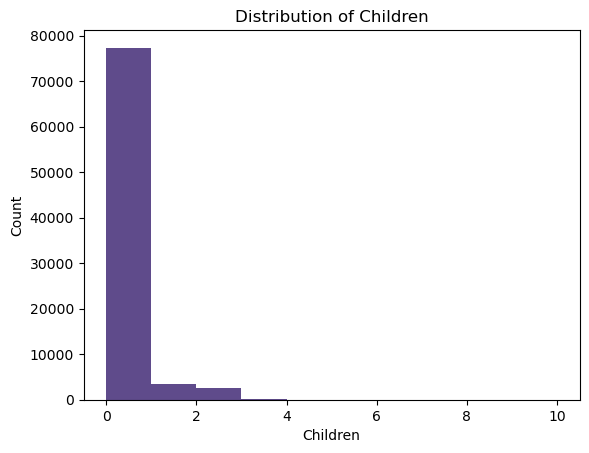

In [247]:

plt.hist(df['children'],color='#5F4B8B')
plt.title('Distribution of Children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

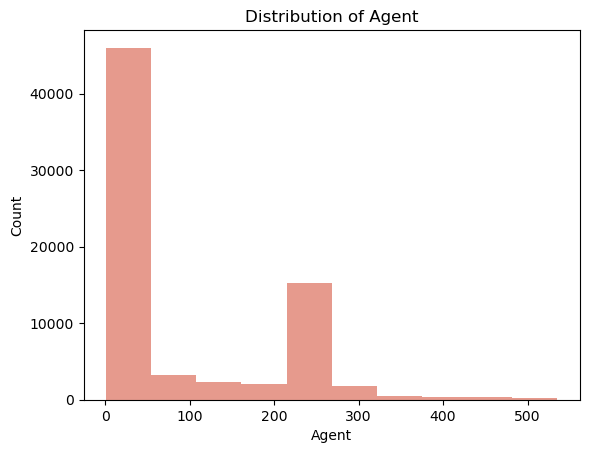

In [248]:
plt.hist(df['agent'],color='#E69A8D')
plt.title('Distribution of Agent')
plt.xlabel('Agent')
plt.ylabel('Count')
plt.show()

In [249]:
#handing missing values
df.drop(['company'],axis='columns',inplace=True)
df['children'].fillna(df['children'].median(),inplace=True)
df['agent'].fillna(df['agent'].median(),inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           83293 non-null  object        
 1   is_canceled                     83293 non-null  int64         
 2   lead_time                       83293 non-null  int64         
 3   arrival_date_year               83293 non-null  int64         
 4   arrival_date_month              83293 non-null  object        
 5   arrival_date_week_number        83293 non-null  int64         
 6   arrival_date_day_of_month       83293 non-null  int64         
 7   stays_in_weekend_nights         83293 non-null  int64         
 8   stays_in_week_nights            83293 non-null  int64         
 9   adults                          83293 non-null  int64         
 10  children                        83293 non-null  float64       
 11  ba

In [251]:
df.duplicated().sum()

0

In [252]:
#check outlier
numericals=df.select_dtypes(include=['number']).columns
total_otlier=0
for column in numericals:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_bond=q1-1.5*iqr
    upper_bond=q3+1.5*iqr

    outlier=df[(df[column]<lower_bond)|(df[column]>upper_bond)]
    total_otlier +=outlier.shape[0]
print(f'Total outlier di seluruh data frame: {total_otlier}')

Total outlier di seluruh data frame: 67599


# Exploratory Data Analysis

In [253]:
#info data numericals
numericals=df.select_dtypes(include=['number']).columns
df[numericals].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,bookingID
count,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000
mean,0.369503,103.914230,2018.156808,27.164023,15.786116,0.930390,2.503812,1.854466,0.103610,0.008032,0.030243,0.086994,0.141765,0.223068,76.890711,2.352238,101.724373,0.061818,0.571945,41647.000000
std,0.482673,106.874124,0.706656,13.623752,8.775931,1.004196,1.924511,0.606139,0.398815,0.100641,0.171255,0.862988,1.554390,0.656237,106.007919,17.820652,48.082552,0.245027,0.793742,24044.762323
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.530000,0.000000,0.000000,20824.000000
50%,0.000000,69.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.500000,0.000000,0.000000,41647.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000,126.000000,0.000000,1.000000,62470.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,70.000000,21.000000,535.000000,391.000000,508.000000,8.000000,5.000000,83293.000000


Obsevasi:
- rata-rata not canceled
- range pemesnan 2017-2019
- rata rata customer nginep 2 malam di weekend
- rata-rata customer nginep 3 malam di hari kerja
- rata-rata customer dua orang dewasa
- rata-rata cutomer tambahan seperti childeren and babies 0

In [254]:
#info data categorical
categorical=df.select_dtypes(include=['object']).columns
df[categorical].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,83293,83293,83293,83293,83293,83293,83293,83293,83293,83293,83293
unique,64,12,5,165,8,5,10,11,3,4,3
top,Renaissance New York Times Square Hotel New Yo...,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,1373,9643,64424,34298,39445,68368,60062,51702,72979,62535,52516


Observasi:
- Hotel yang paling banyak dipesan adalah Renaissance New York Times Square Hotel New York
- Bulan Agustus banyak customer tiba
- Untuk paket meal customer paling banyak memilih BB
- Customer paling banyak dari kota Portugal

In [255]:
print(df[numericals].dtypes)

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
bookingID                           int64
dtype: object


In [256]:
#correlation heatmap
# plt.figure(figsize=(25,15))
# correlation=df[numericals].corr()
# sns.heatmap(correlation, annot=True, fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

Observasi yang memiliki pengaruh is cancelled:
- lead time
- is repeated guest
- previous cancellation (+)
- booking changes (-)
- required car parking spaces (-)
- total of special request (-)

## Deep Analysis

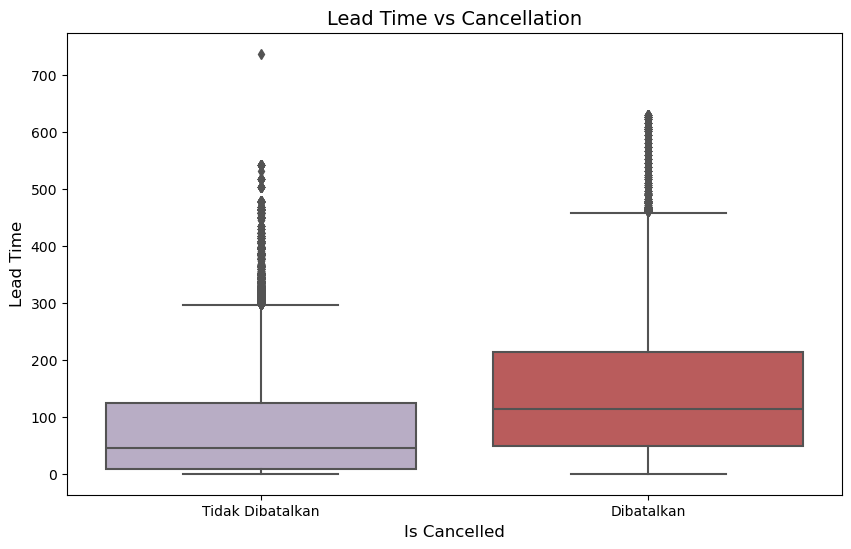

In [257]:
# Penyebab pelanggan membatalkan reservasi
plt.figure(figsize=(10,6))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette={0:'#b8a9c9',1:'#c94c4c'})

plt.title('Lead Time vs Cancellation',fontsize=14)
plt.xlabel('Is Cancelled',fontsize=12)
plt.ylabel('Lead Time',fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Tidak Dibatalkan', 'Dibatalkan'])
plt.show()


Observasi:
- Lebih panjang lead time, semakin tinggi kemungkinan pembatalan.

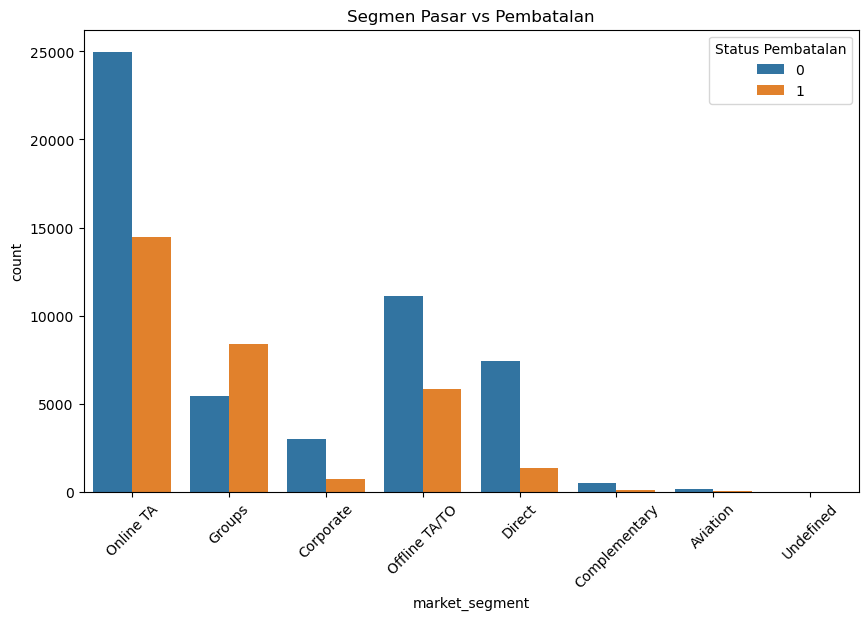

In [258]:
# Segmen Pasar vs Pembatalan
plt.figure(figsize=(10,6))
df['is_canceled']=df['is_canceled'].astype(str)
sns.countplot(x='market_segment',hue='is_canceled',data=df)
plt.title('Segmen Pasar vs Pembatalan')
plt.legend(title='Status Pembatalan',loc='upper right')
plt.xticks(rotation=45)
plt.show()

Observasi:
- Lebih banyak segmen group yang membatalkan dibandingkan dengan reservasi yang tidak dibatalkan. 
- Online TA memiliki reservasi terbanyak, yang membatalkan masih lebih sedikit dibandingkan yang berhasil

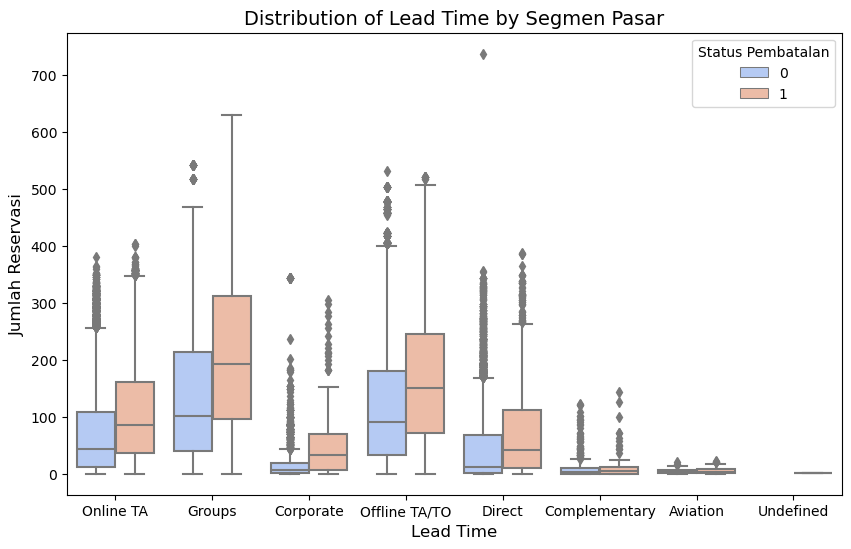

In [259]:
# Distribution of Lead Time by Segmen Pasar
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='market_segment', y='lead_time', hue='is_canceled', palette='coolwarm')
plt.title('Distribution of Lead Time by Segmen Pasar',fontsize=14)
plt.xlabel('Lead Time',fontsize=12)
plt.ylabel('Jumlah Reservasi',fontsize=12)
plt.legend(title='Status Pembatalan', loc='upper right')
plt.show()

Observasi:
- Pemesanan melalui online TA dengan lead time yang lebih panjang memiliki kemungkinan lebih besar untuk dibatalkan
- Segmen Online TA, Groups, dan offline TA memiliki trend dimana lead time yang tinggi lebih panjang cendrung lebih besar dibatalkan
- Segmen corporate, pembatalan terjadi dengan lead time yang lebih pendek

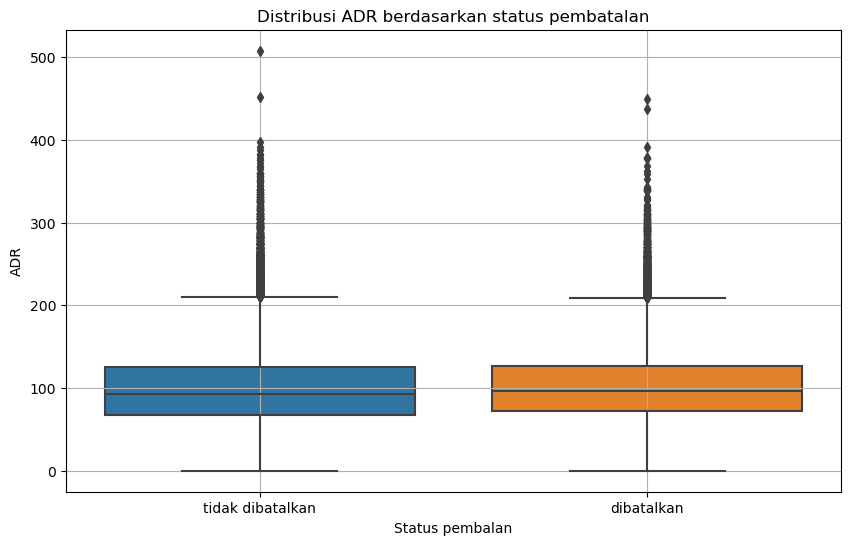

In [260]:
plt.figure(figsize=(10,6))
sns.boxplot(x='is_canceled',y='adr',data=df)
plt.title('Distribusi ADR berdasarkan status pembatalan')
plt.xlabel('Status pembalan')
plt.ylabel('ADR')
plt.xticks([0,1],['tidak dibatalkan','dibatalkan'])
plt.grid()
plt.show()


Observasi:
- customer yang melakukan pembatalan memesan dengan harga yang lebih tinggi
- ADR berpengaruh terhadap pembatalan

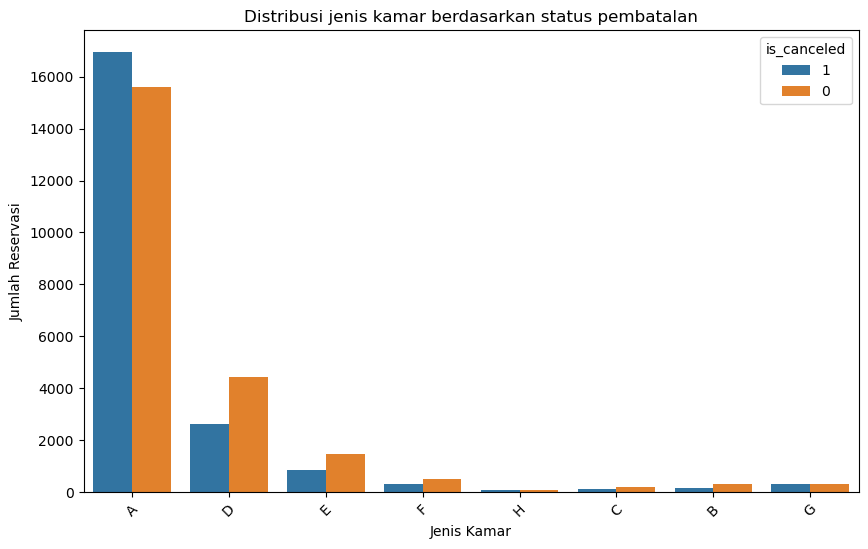

In [261]:
lead_time_threshold=60
long_lead_time=df[df['lead_time']>lead_time_threshold]

plt.figure(figsize=(10,6))
sns.countplot(data=long_lead_time,x='reserved_room_type',hue='is_canceled')
plt.title('Distribusi jenis kamar berdasarkan status pembatalan')
plt.xlabel('Jenis Kamar')
plt.ylabel('Jumlah Reservasi')
plt.xticks(rotation=45)
plt.show()

Observasi:
- Untukk kamar A memiliki jumlah reservasi terbanyak yang dibatalkan
- Kamar D memiliki jumlah reservasi yang tidak dibatalkan lebih banyak dari pada yang tidak 
- kamar E reservasi yang tidak dibatalkan lebih tinggi dari yang dibatalkan 

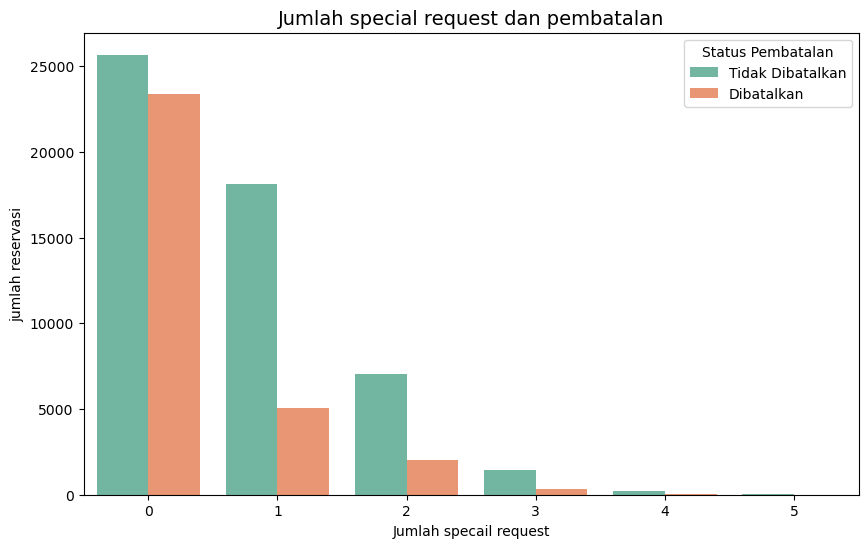

In [262]:
plt.figure(figsize=(10,6))
sns.countplot(x='total_of_special_requests',hue='is_canceled',data=df,palette='Set2')
plt.title('Jumlah special request dan pembatalan',fontsize=14)
plt.xlabel('Jumlah specail request')
plt.ylabel('jumlah reservasi')
plt.legend(title='Status Pembatalan', loc='upper right', labels=['Tidak Dibatalkan', 'Dibatalkan'])
plt.show()

Insight:
- Semaking panjang lead time semakin tinggi kemungkinan reservasi
- Online TA: Pemesanan dengan lead time panjang memiliki kecenderungan lebih tinggi untuk dibatalkan.
- Groups: Lead time yang panjang sedikit meningkatkan peluang pembatalan, tetapi ada faktor lain yang mungkin terlibat (seperti special requests).
- Corporate: Pembatalan lebih sering terjadi pada lead - time pendek.
- Offline TA/TO: Sama seperti Online TA, lead time panjang meningkatkan peluang pembatalan.
- Harga harian yang lebih tinggi berhubungan dengan kemungkinan pembatalan yang lebih besar pada lead time panjang.
- Beberapa tipe kamar (seperti Kamar A) lebih sering dibatalkan, sementara tipe lain seperti Kamar E atau Kamar F memiliki reservasi yang lebih stabil.
- Pembatalan lebih sering terjadi ketika jumlah special requests rendah (misalnya 0).
- Pada saat special requests meningkat (misalnya 1 atau 2), lebih banyak reservasi yang tidak dibatalkan.

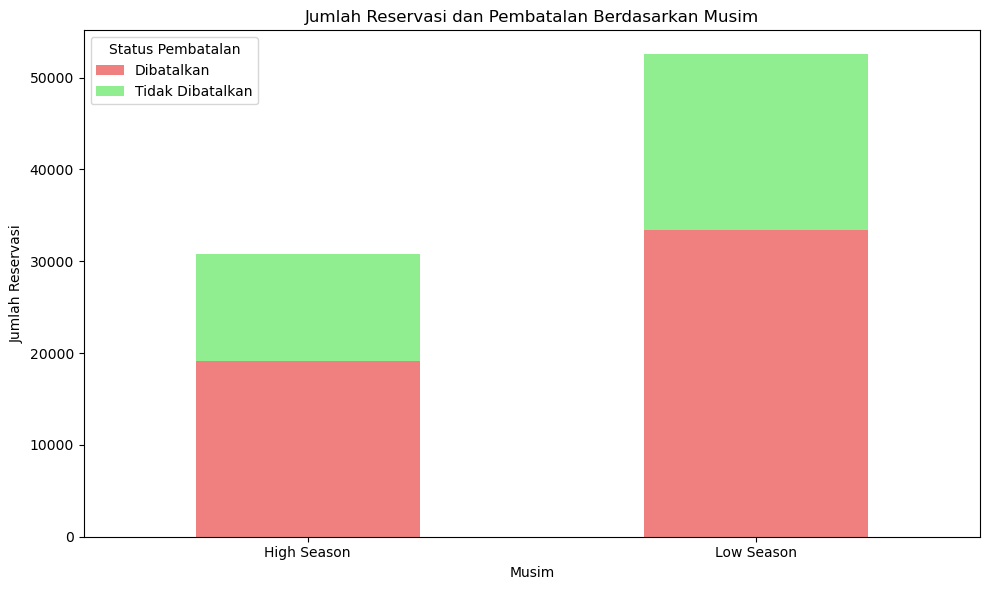

In [263]:
high_season_months=['June','July','August','December']
df['season']=df['arrival_date_month'].apply(lambda x: 'High Season' if x in high_season_months else 'Low Season')

season_counts=df.groupby(['season','is_canceled']).size().unstack(fill_value=0)
season_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], figsize=(10, 6))

# Menambahkan detail pada plot
plt.title('Jumlah Reservasi dan Pembatalan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Reservasi')
plt.xticks(rotation=0)  # Mengatur rotasi x-ticks
plt.legend(['Dibatalkan', 'Tidak Dibatalkan'], title='Status Pembatalan')
plt.tight_layout()
plt.show()

- Low season jumlah reservasi lebih banyak dibandingkan yang high sesaon.
- Baik high season maupun low season lebih banyak yang tidak membatalkan reservasi

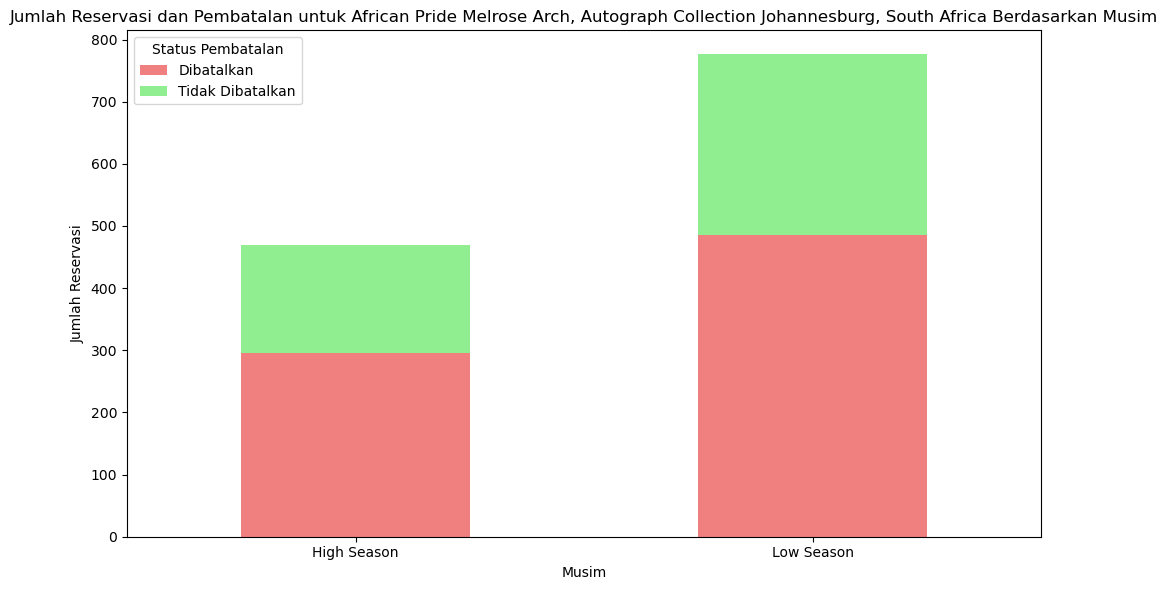

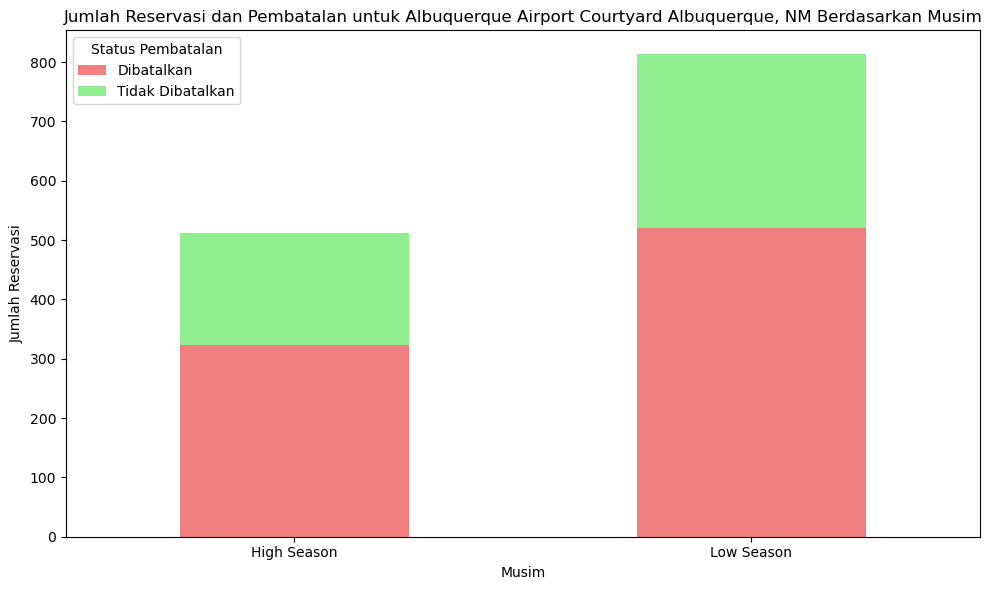

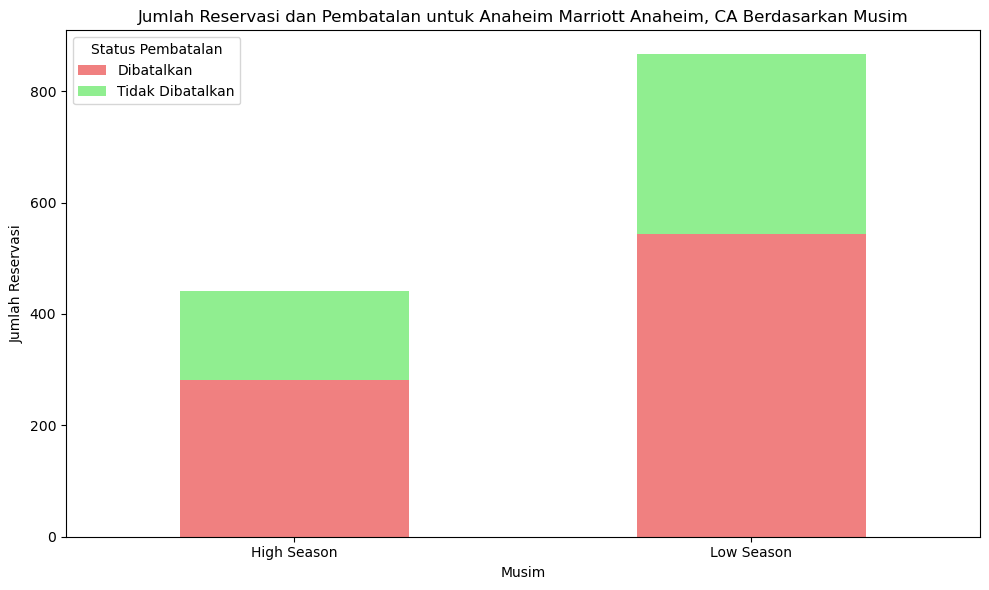

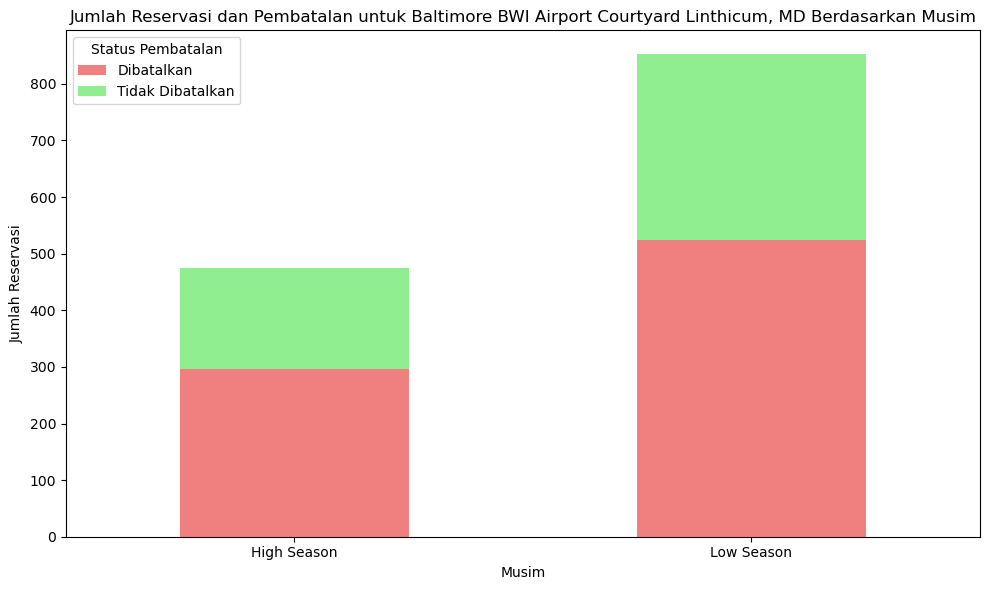

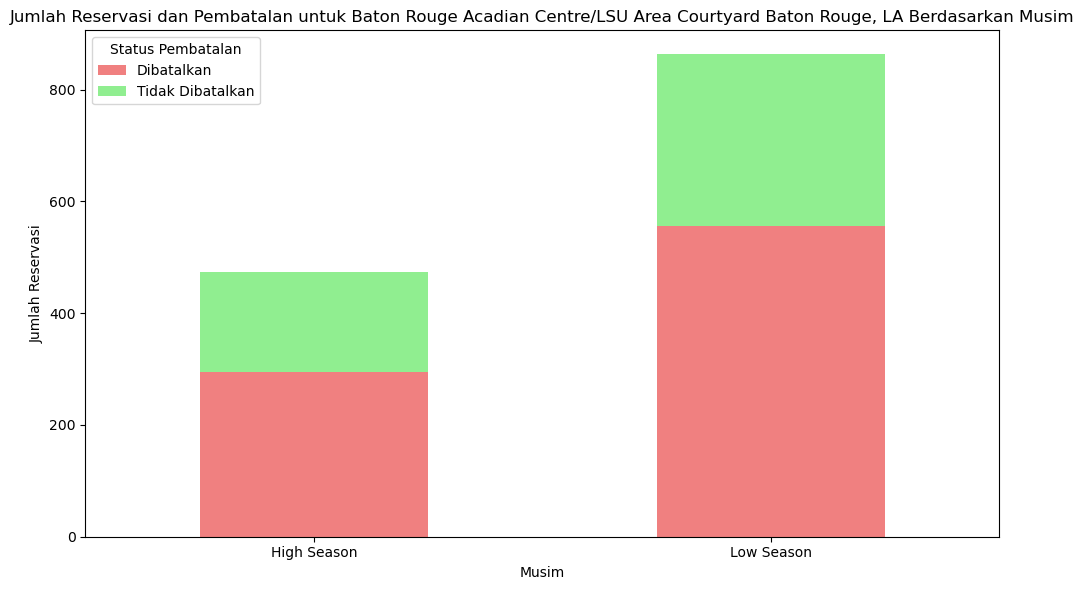

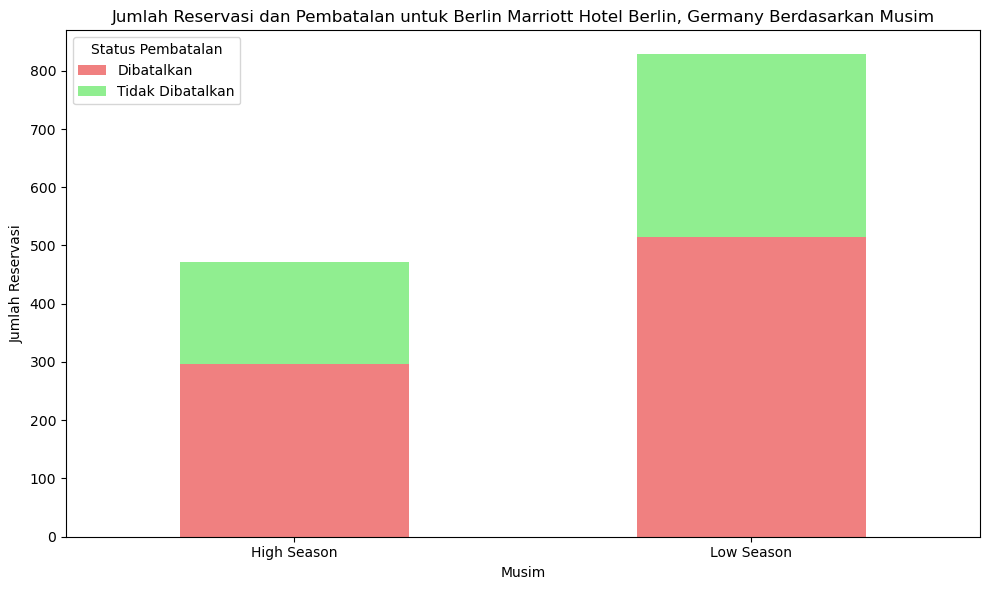

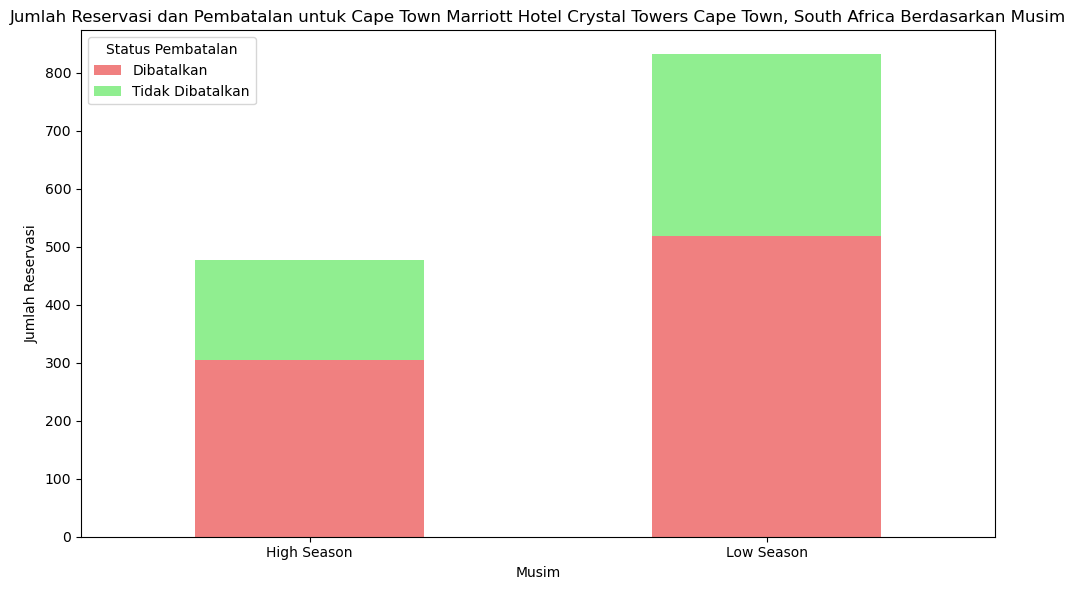

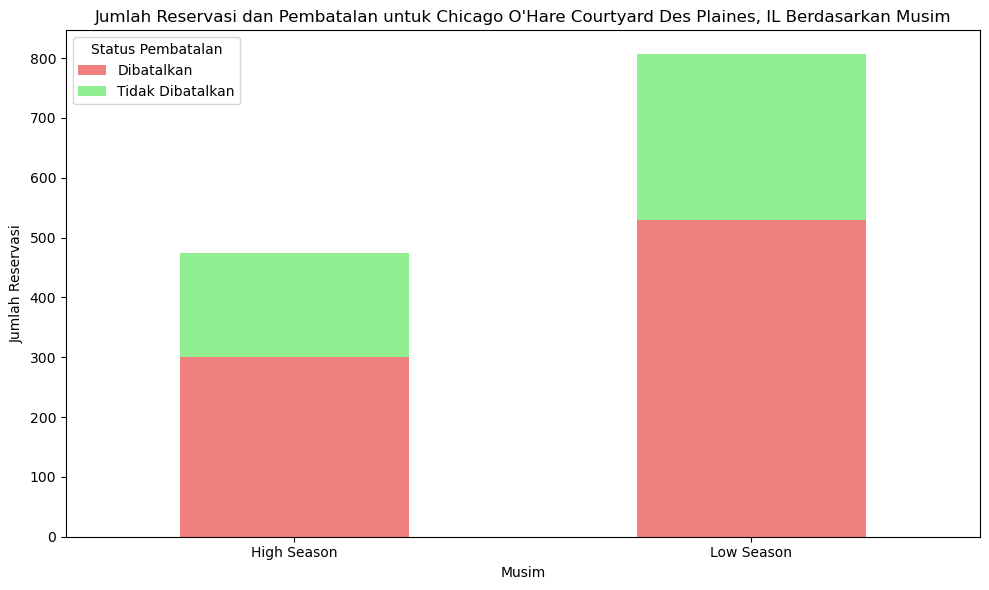

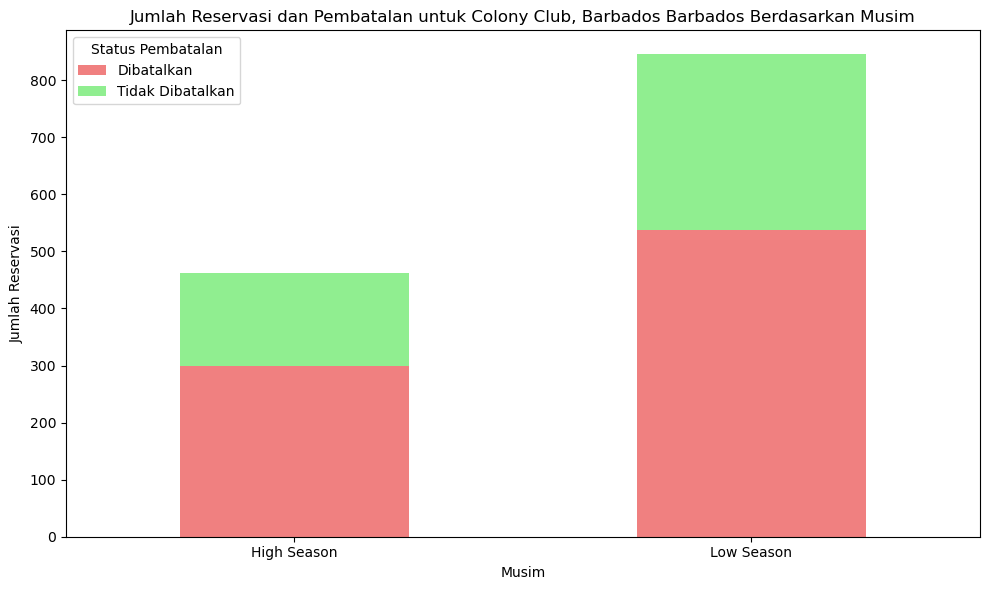

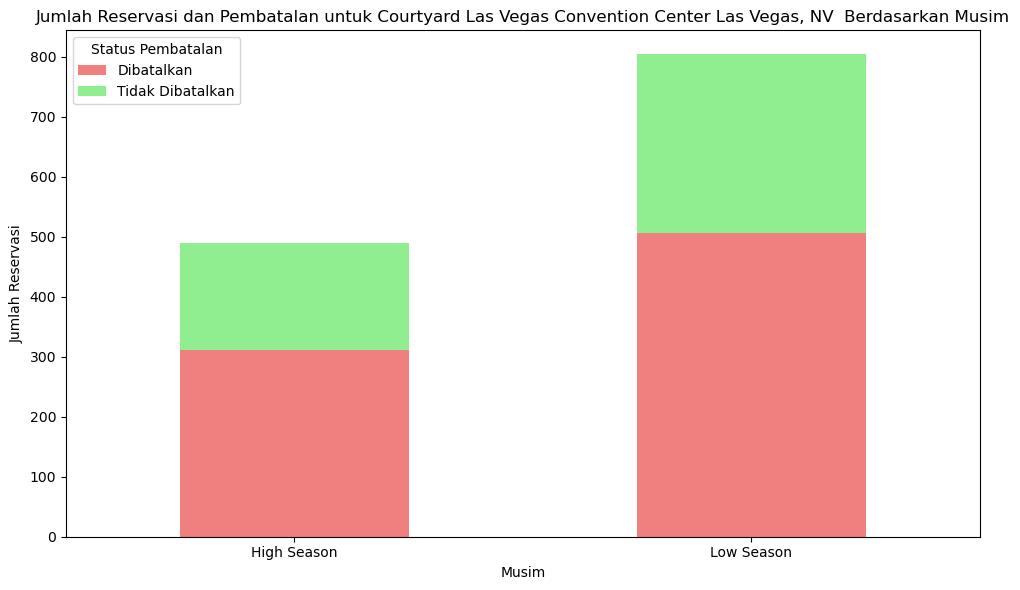

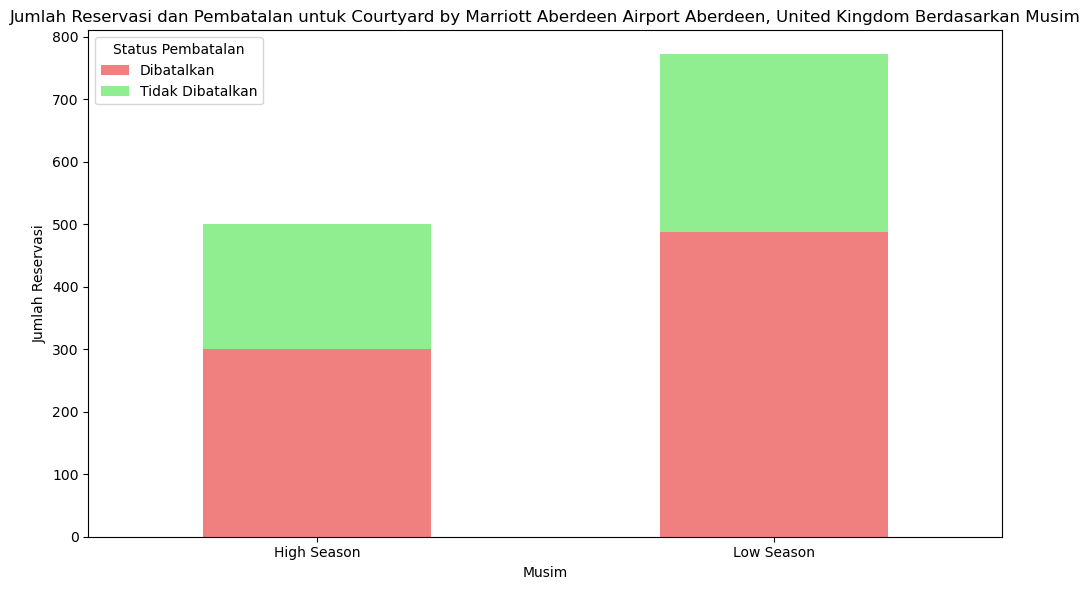

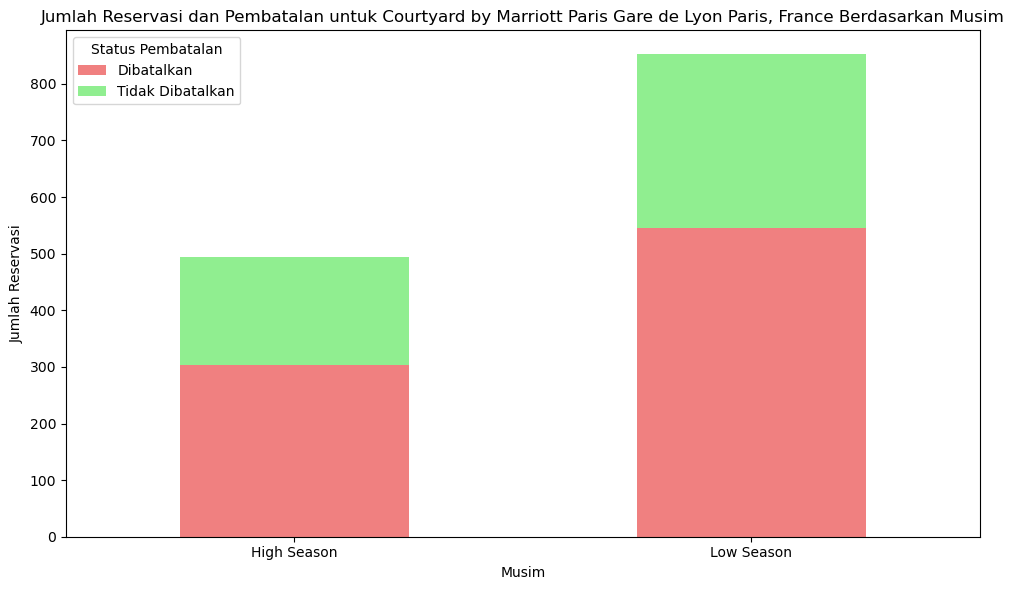

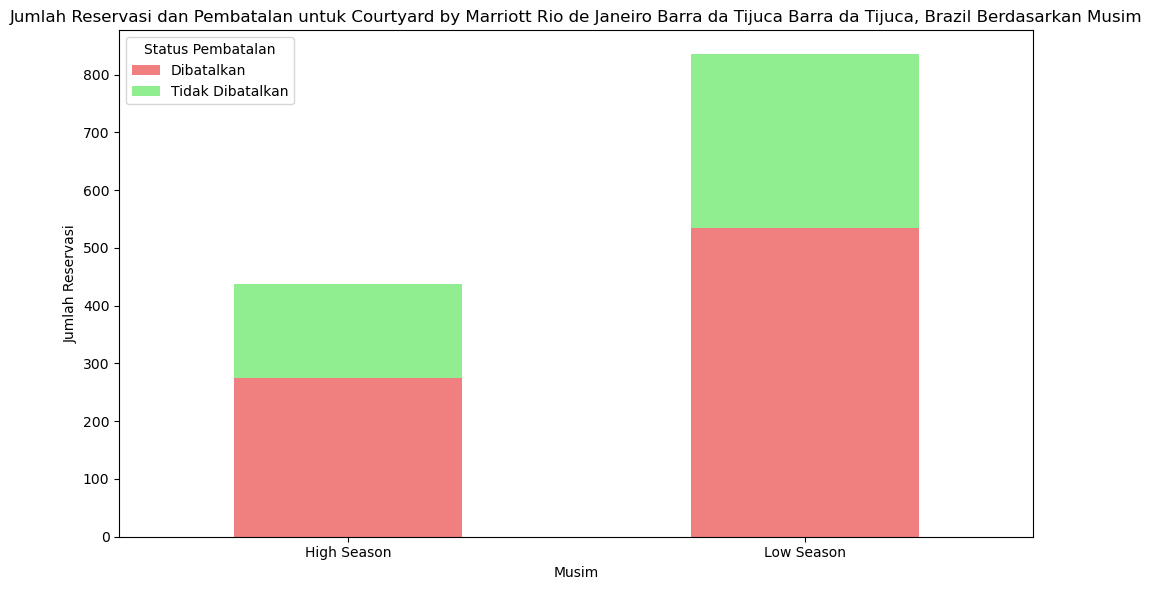

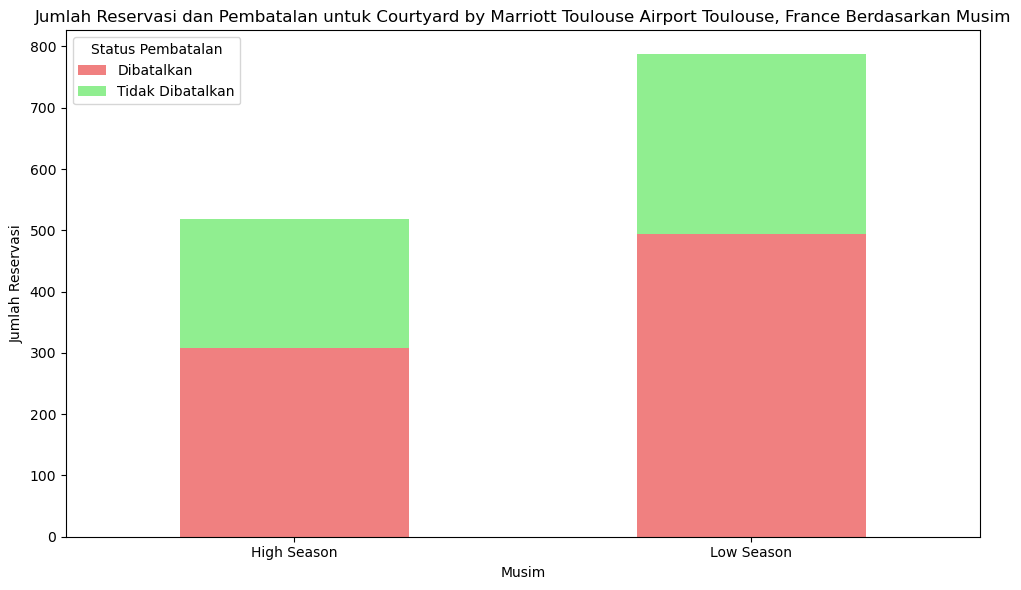

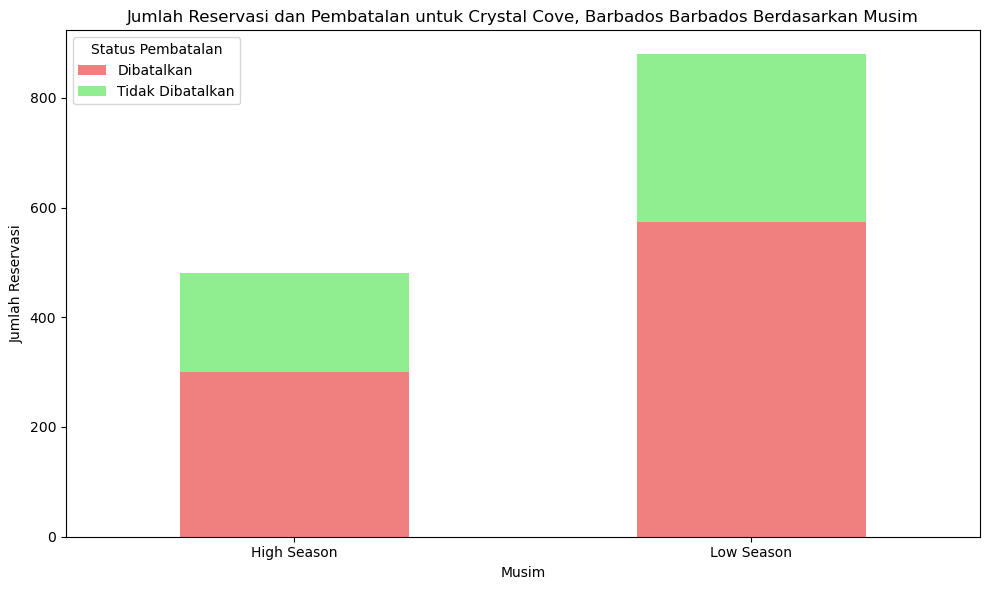

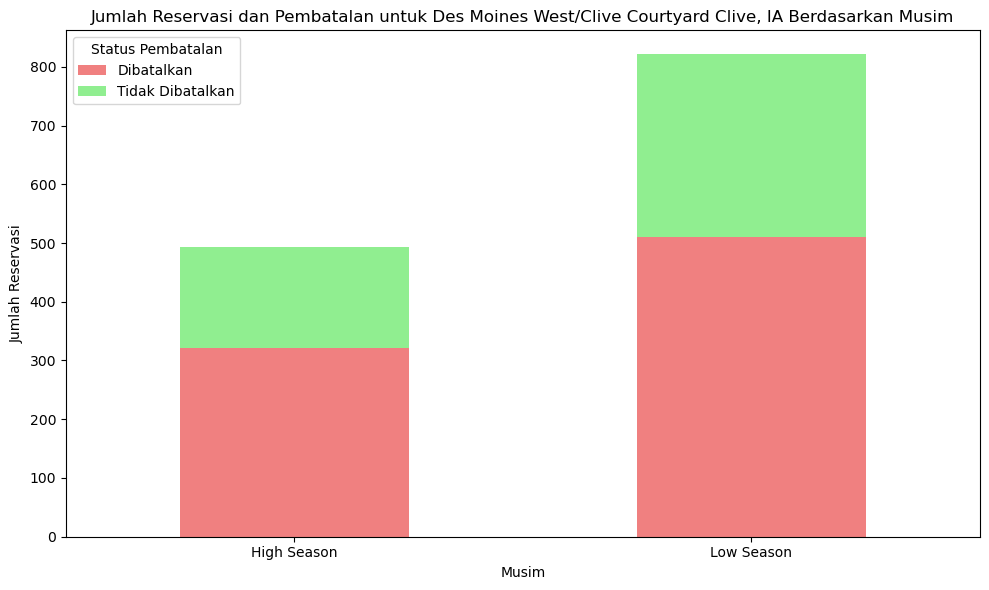

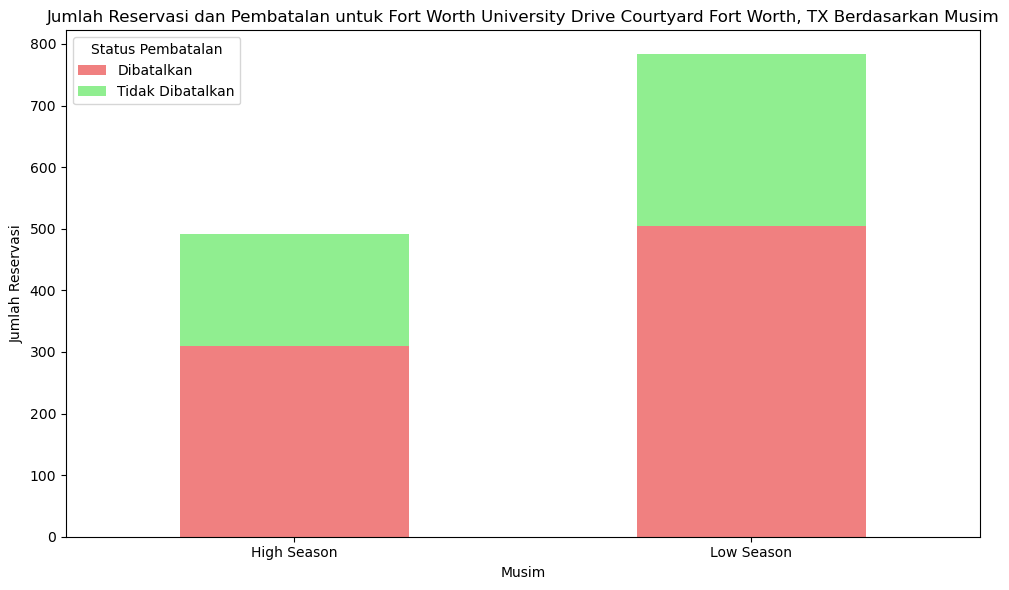

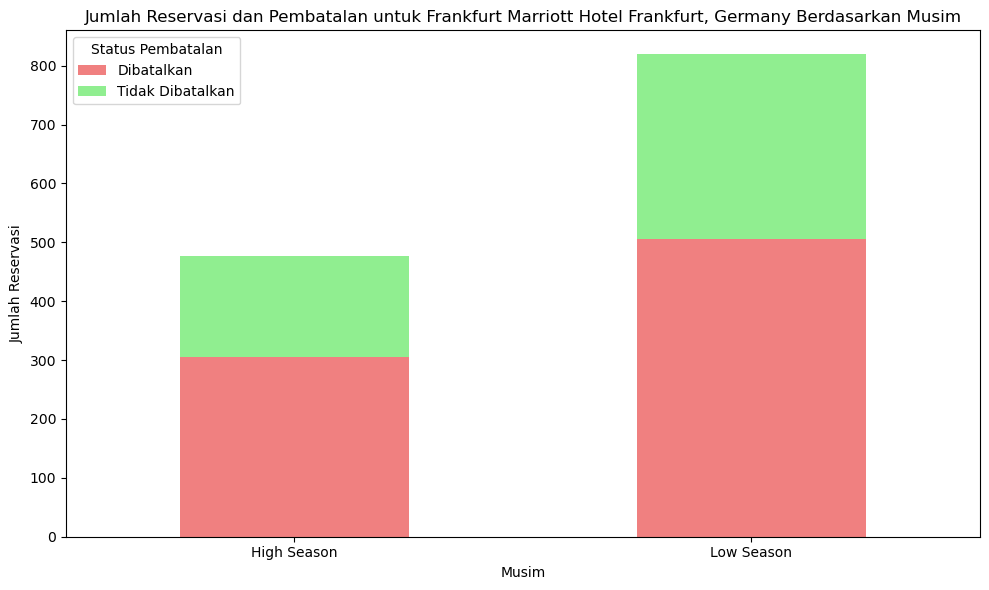

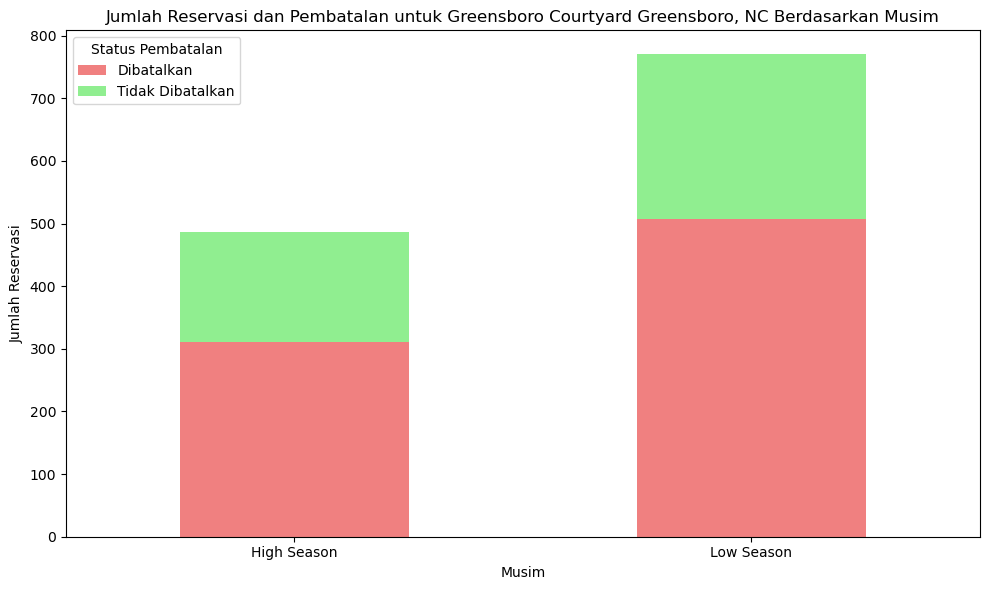

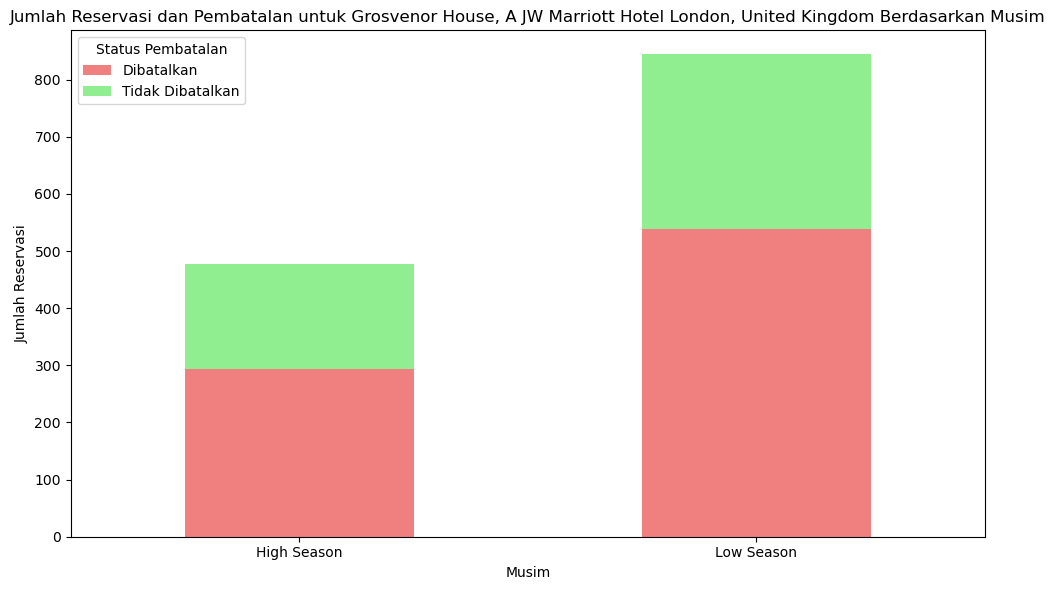

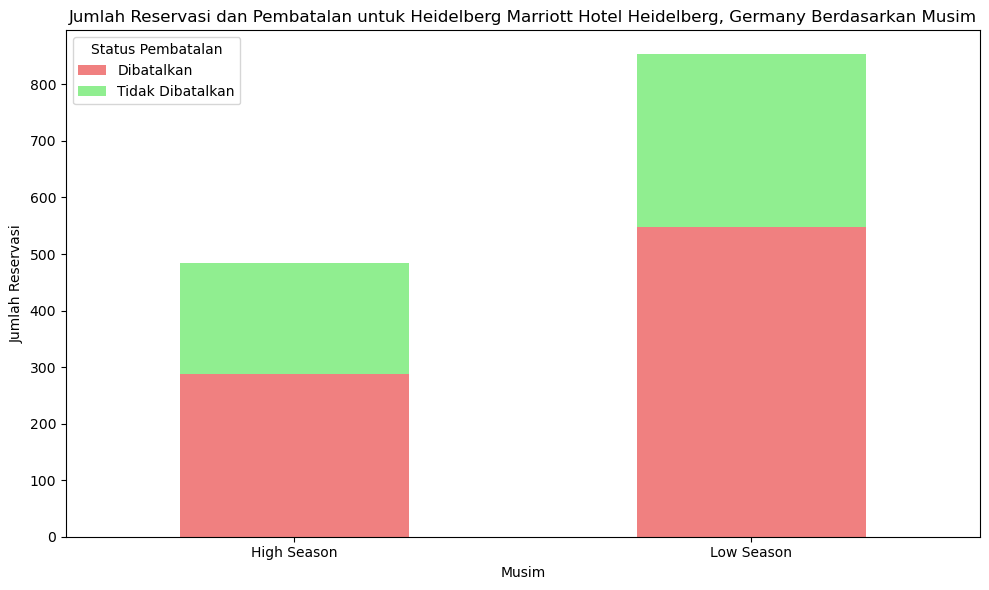

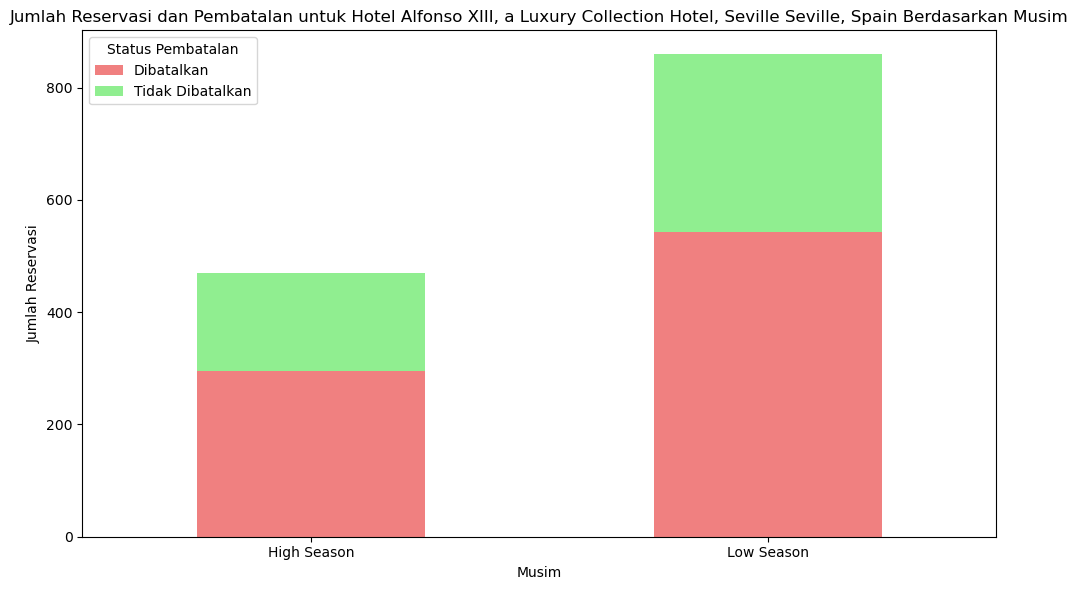

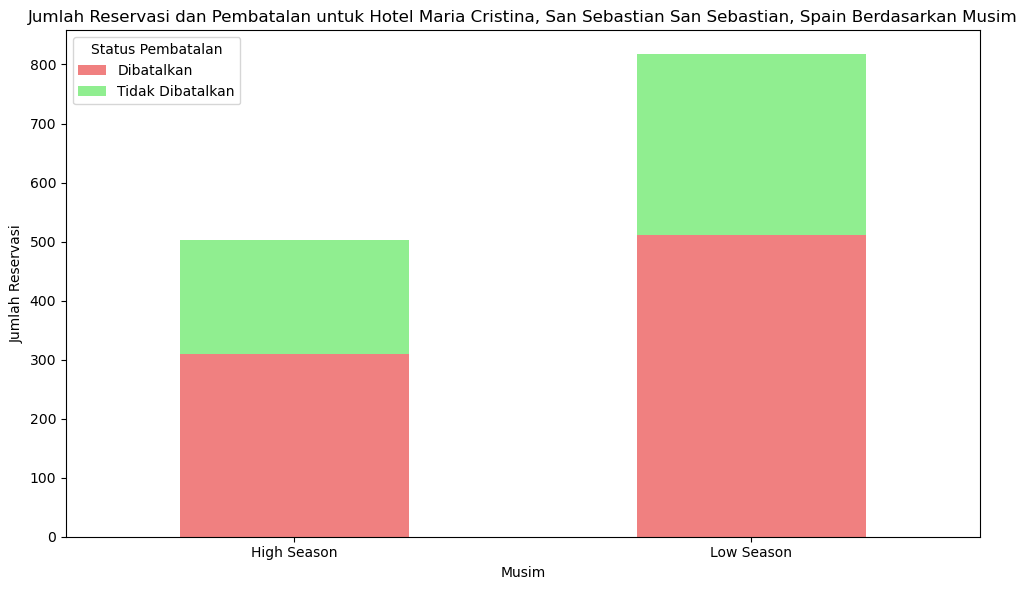

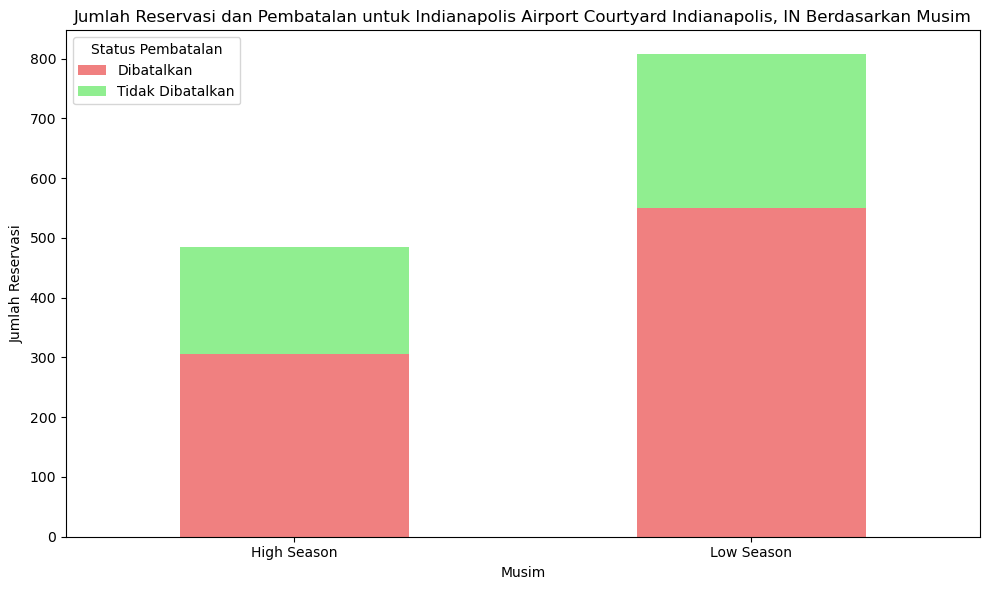

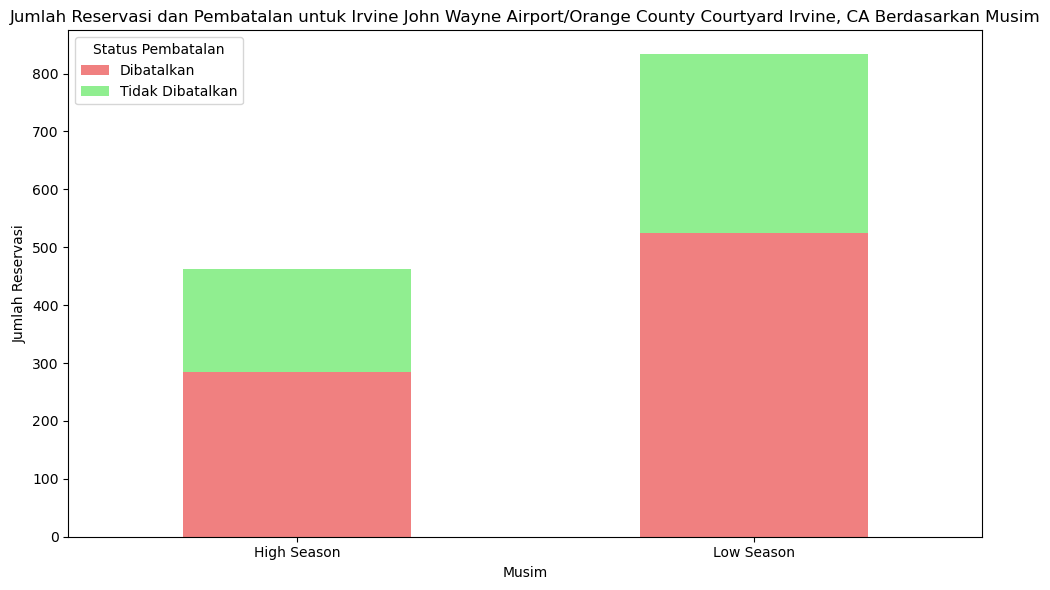

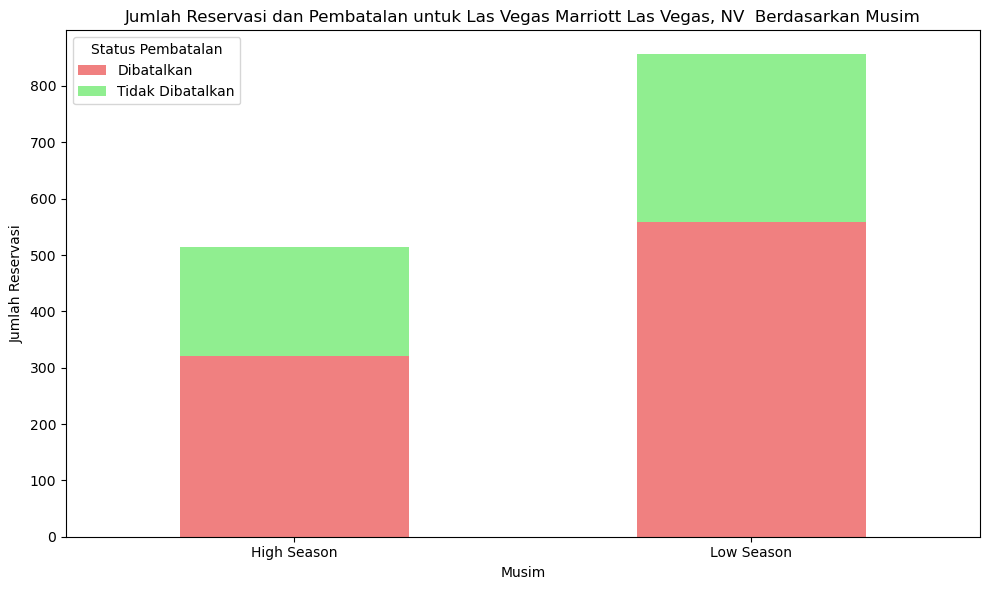

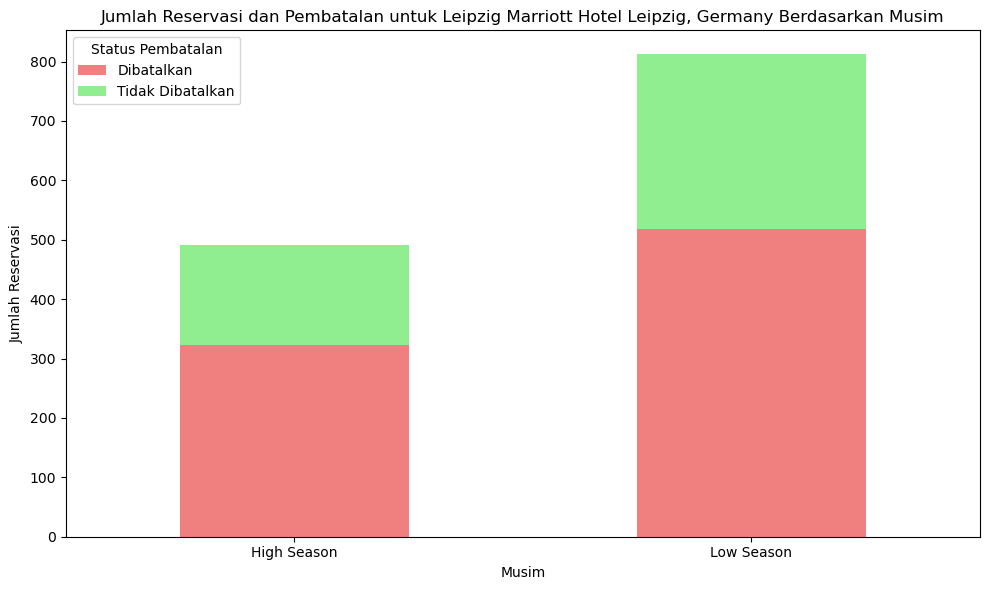

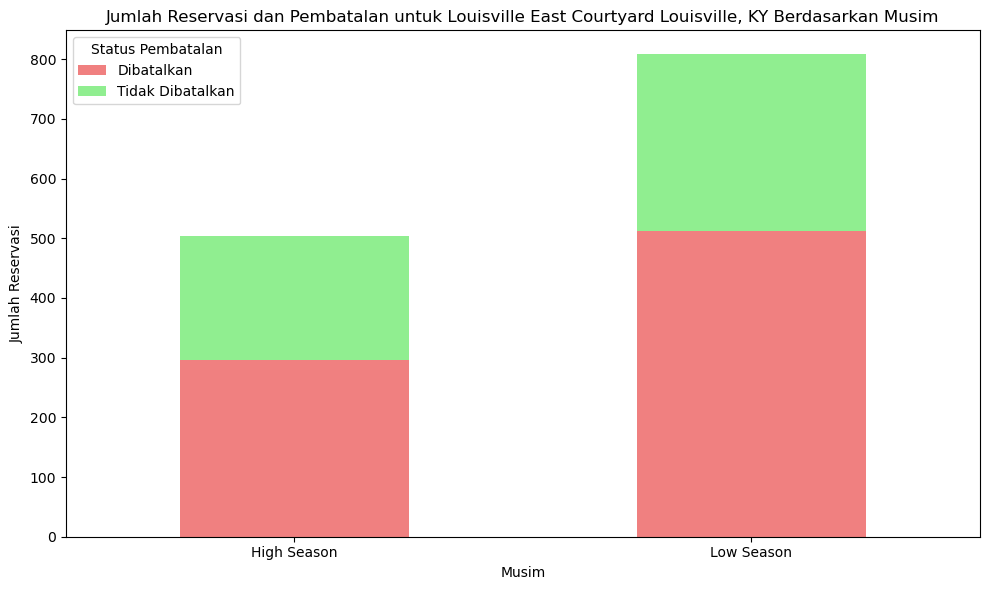

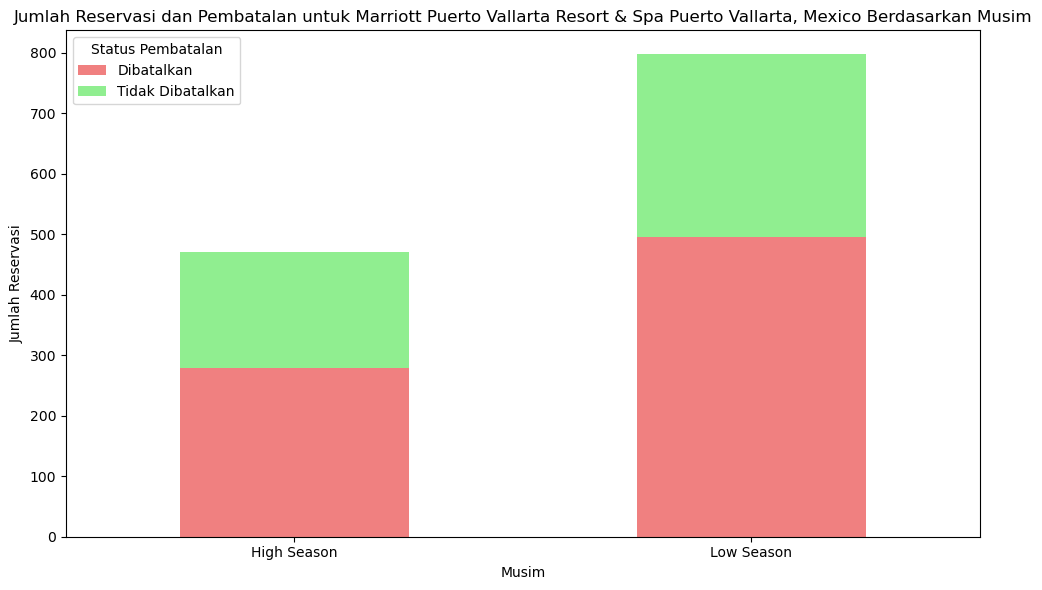

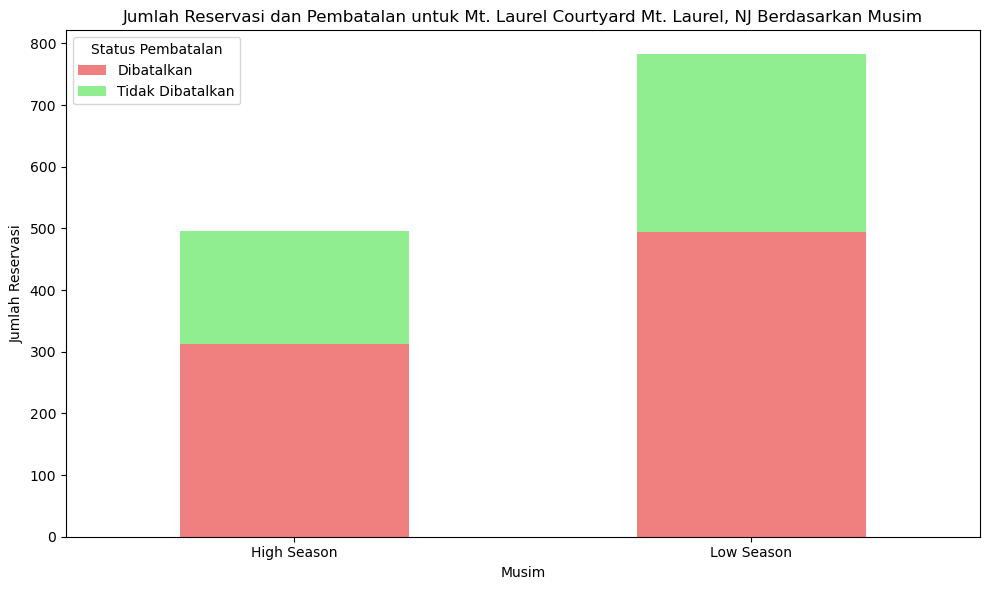

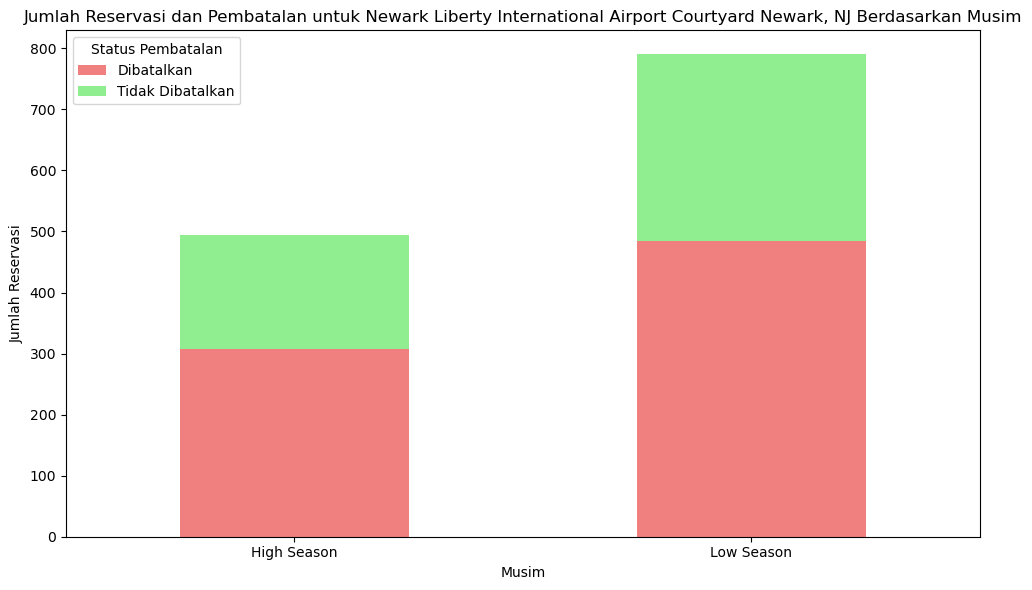

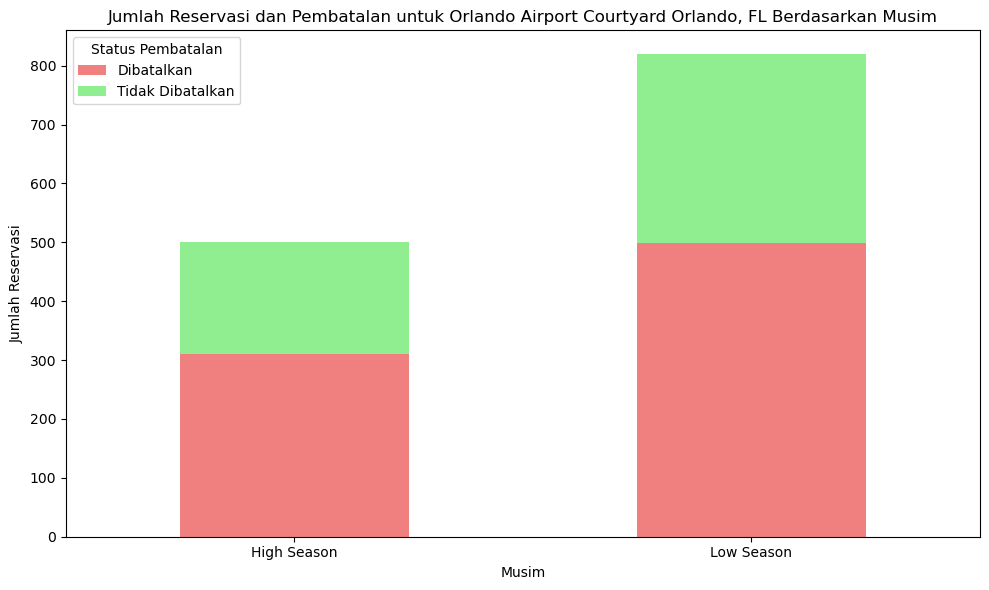

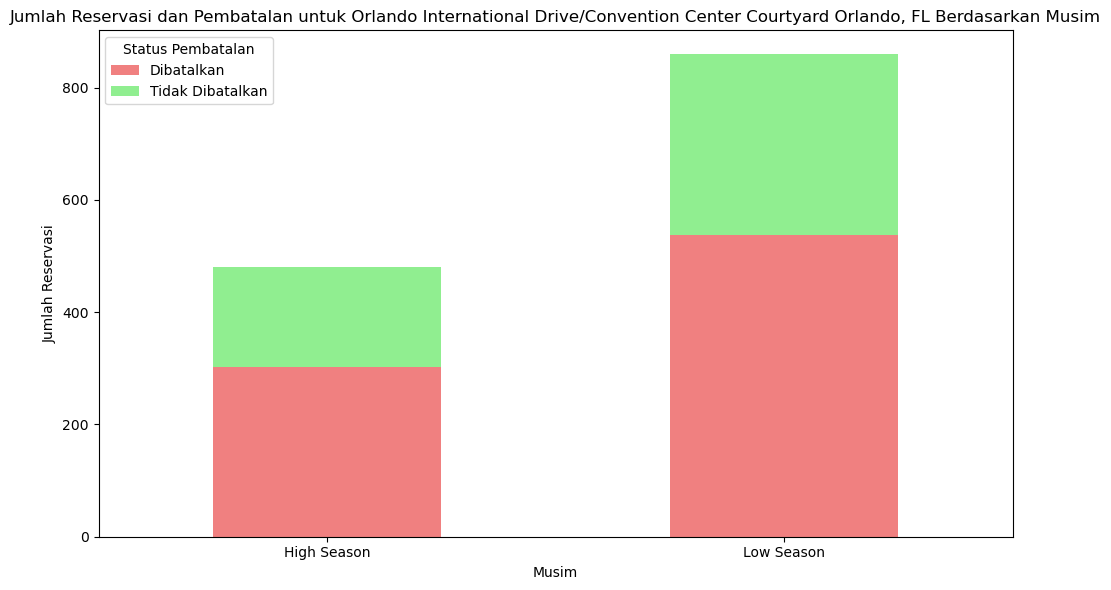

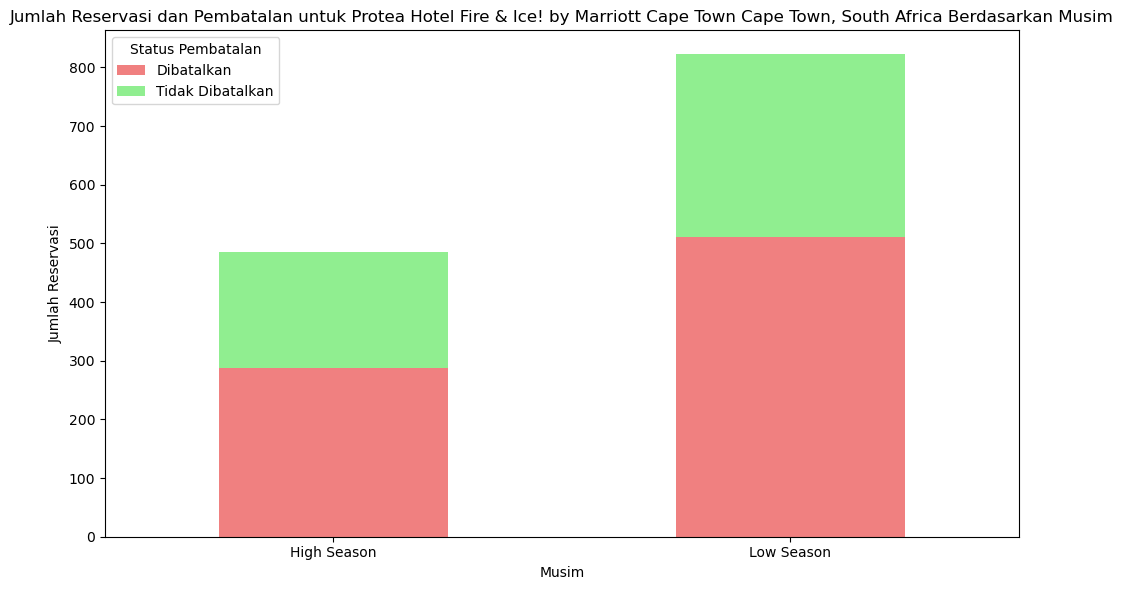

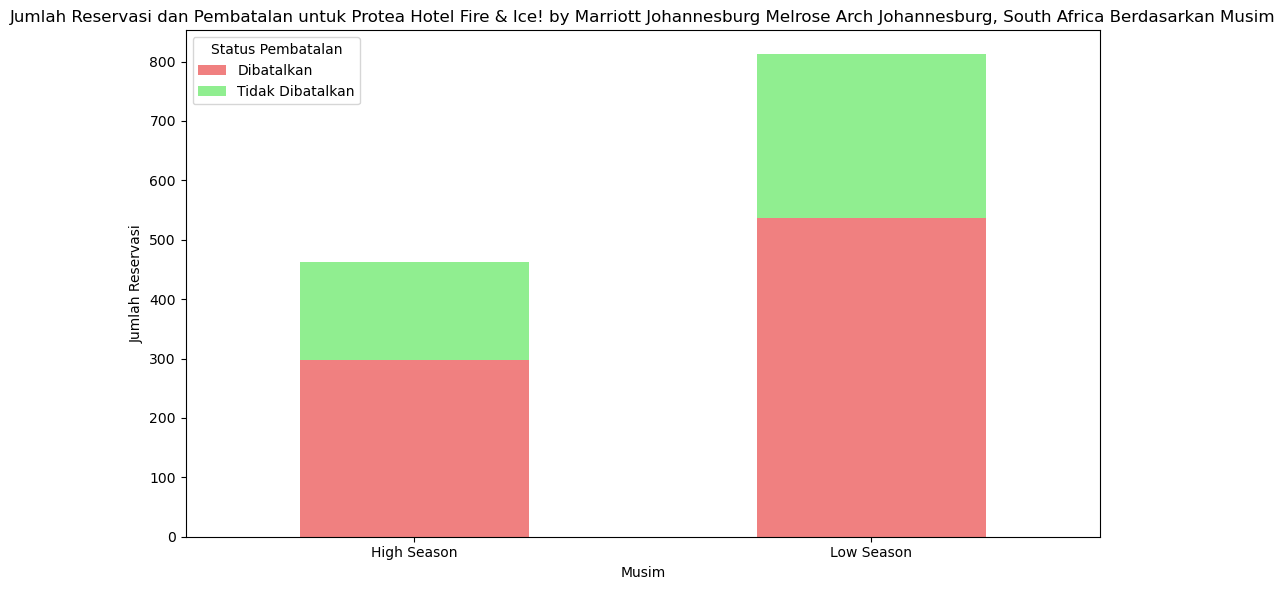

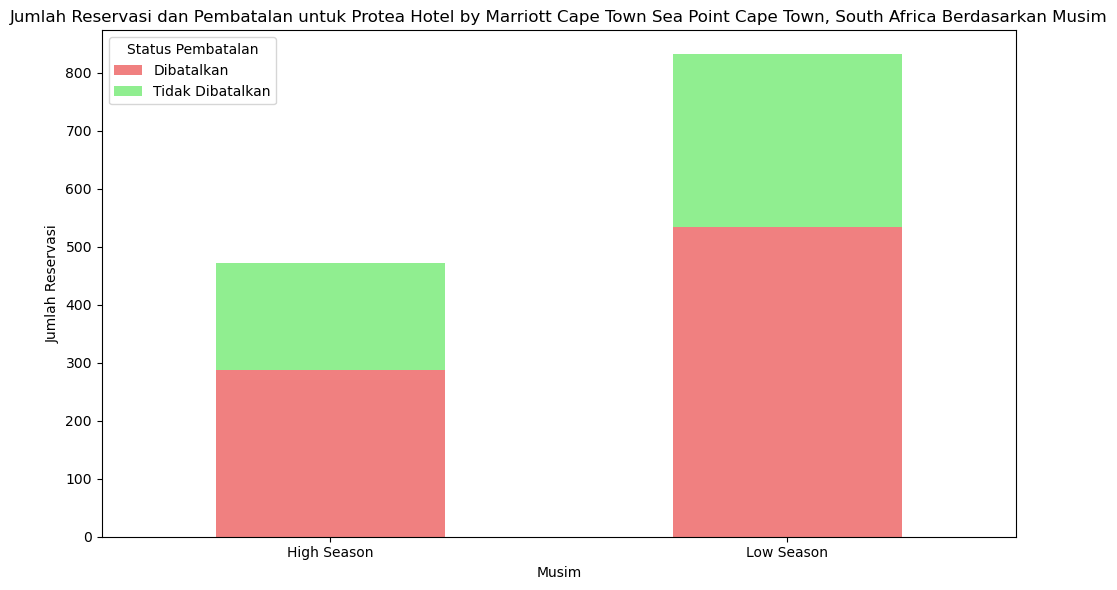

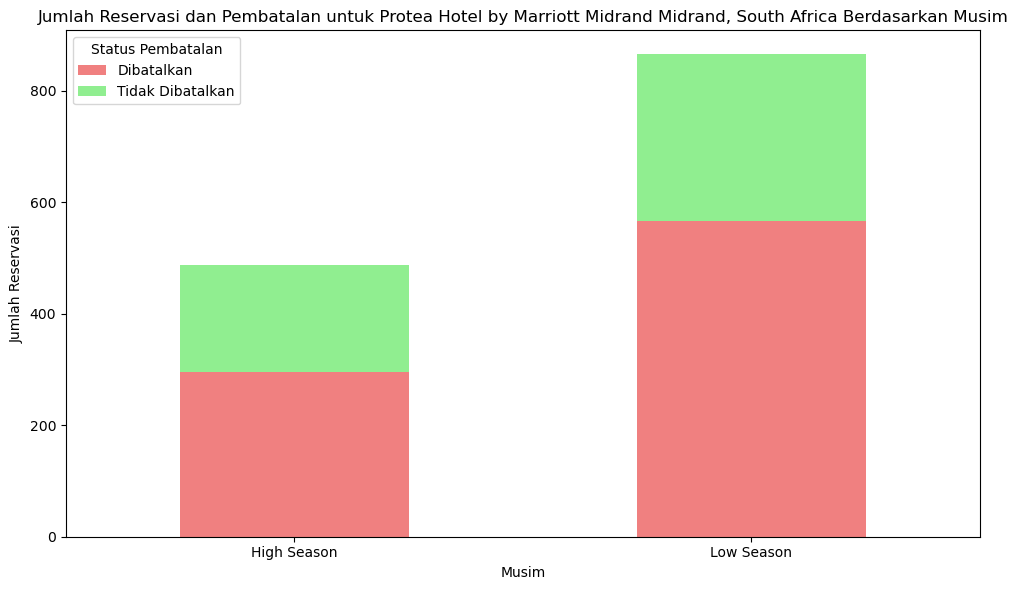

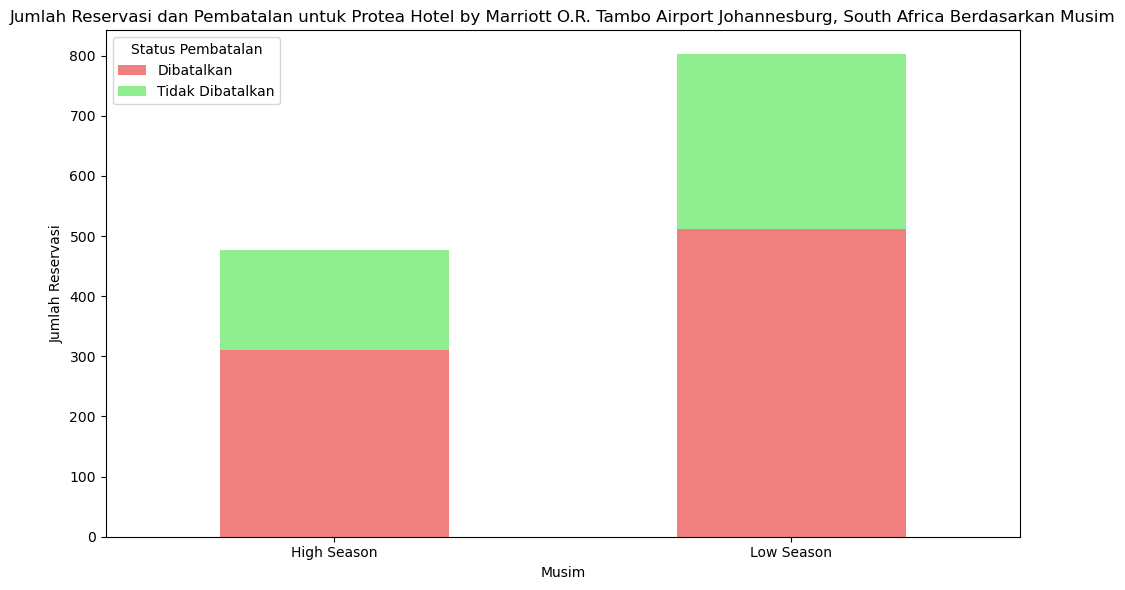

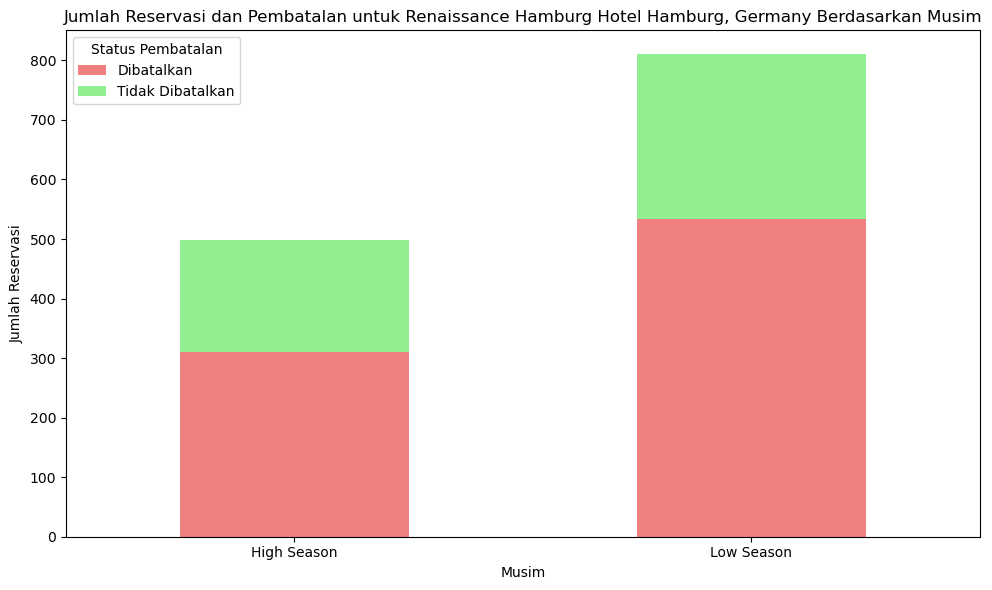

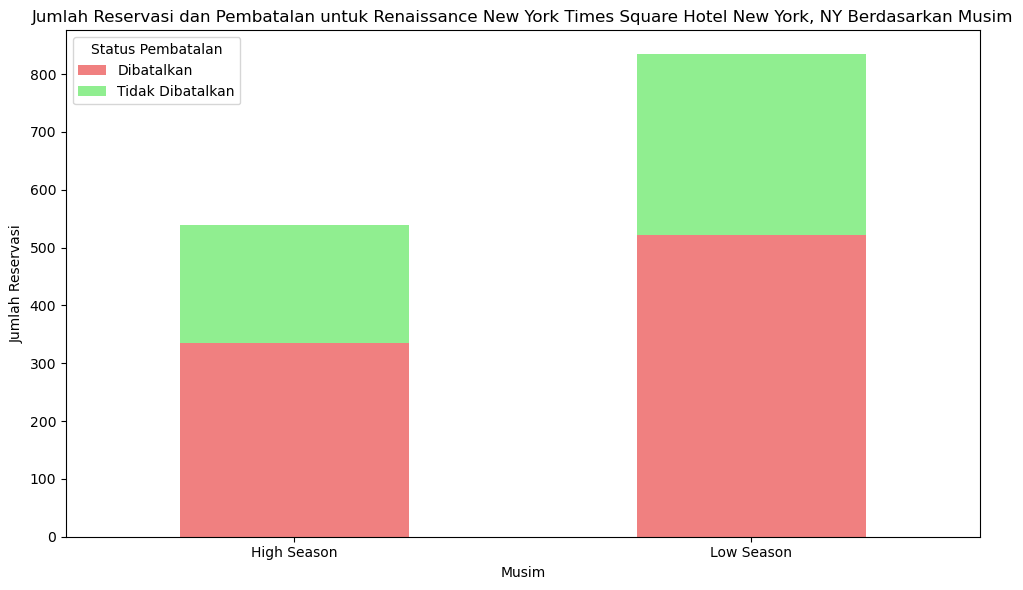

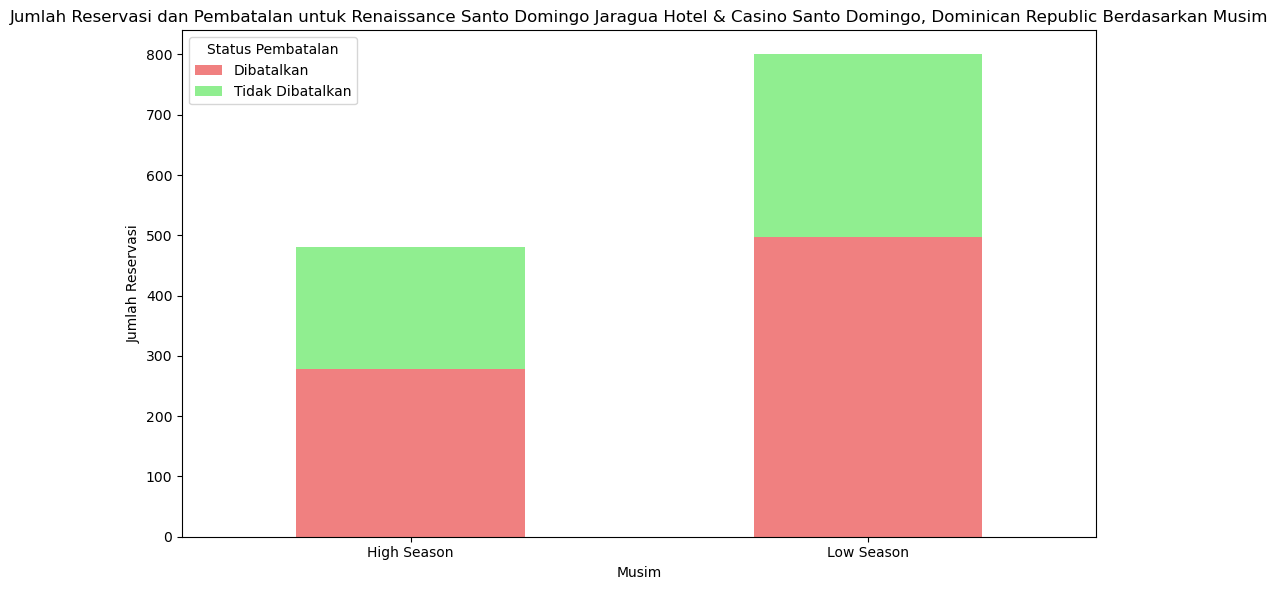

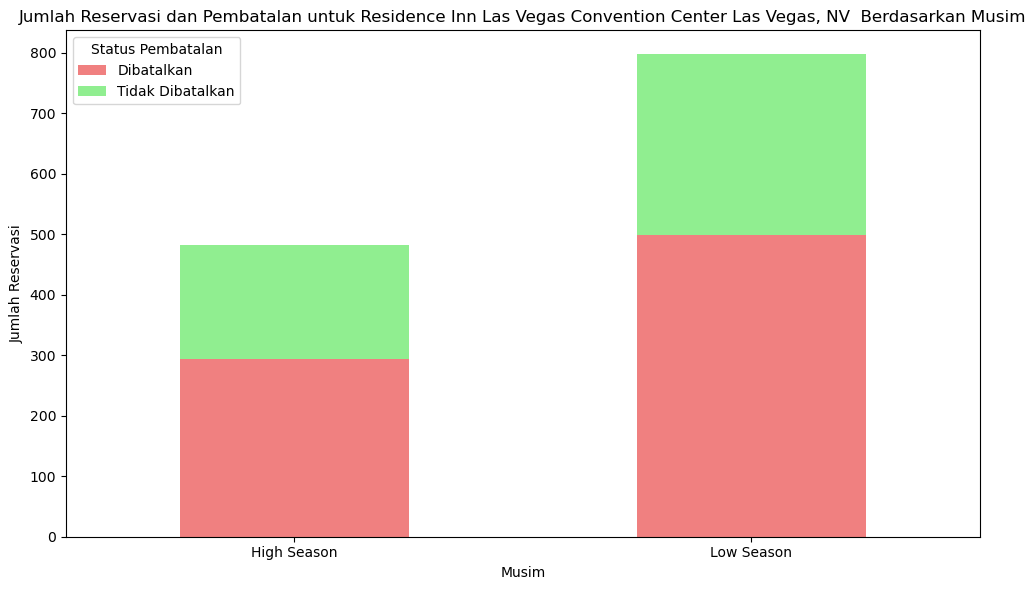

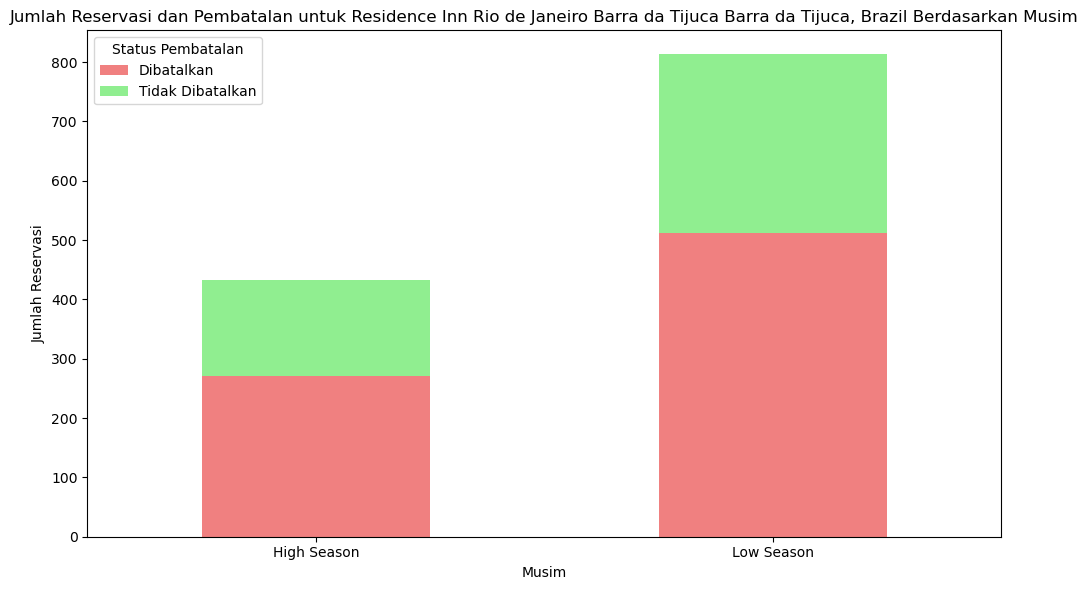

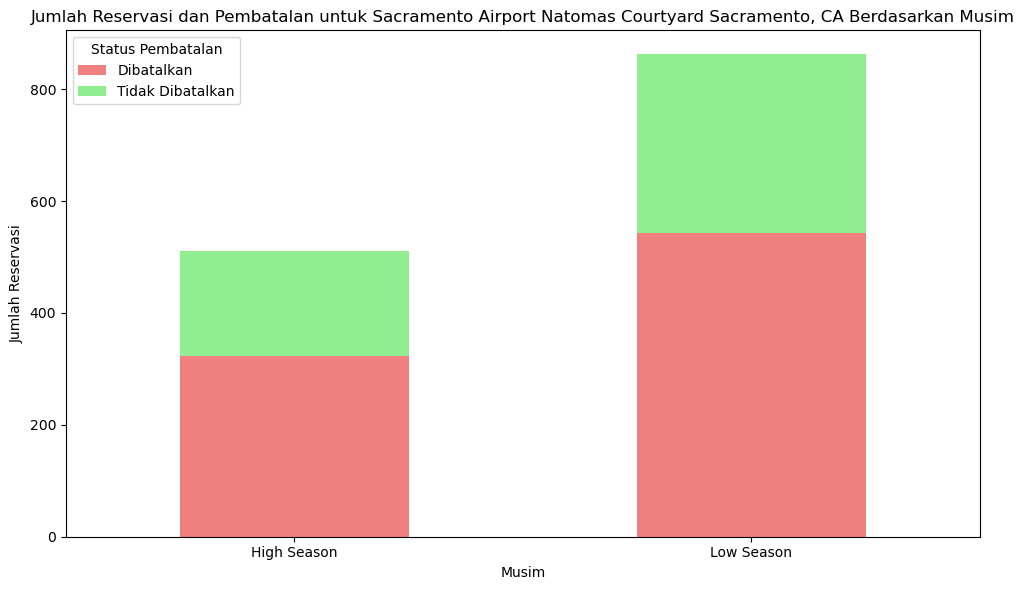

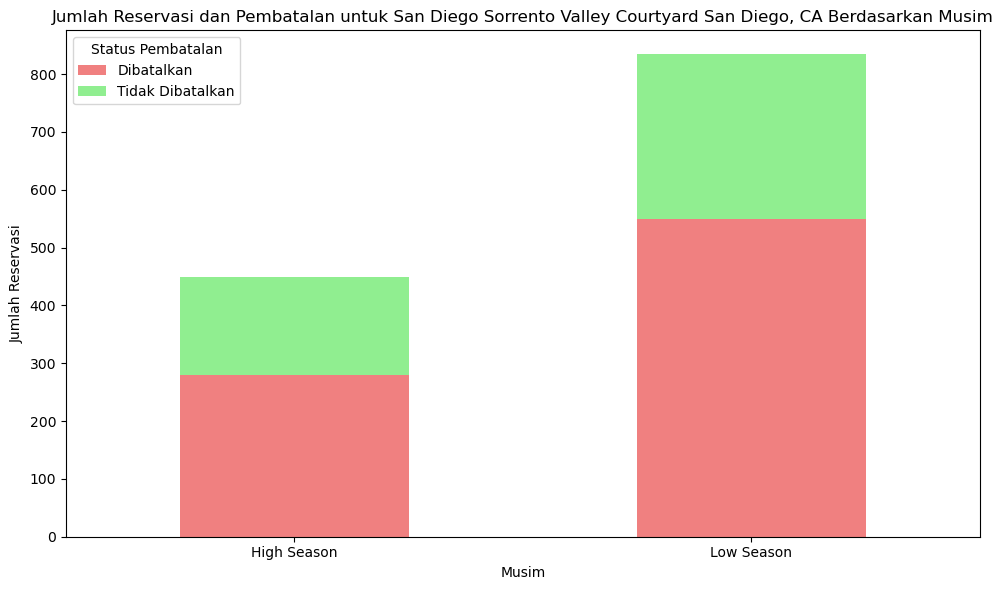

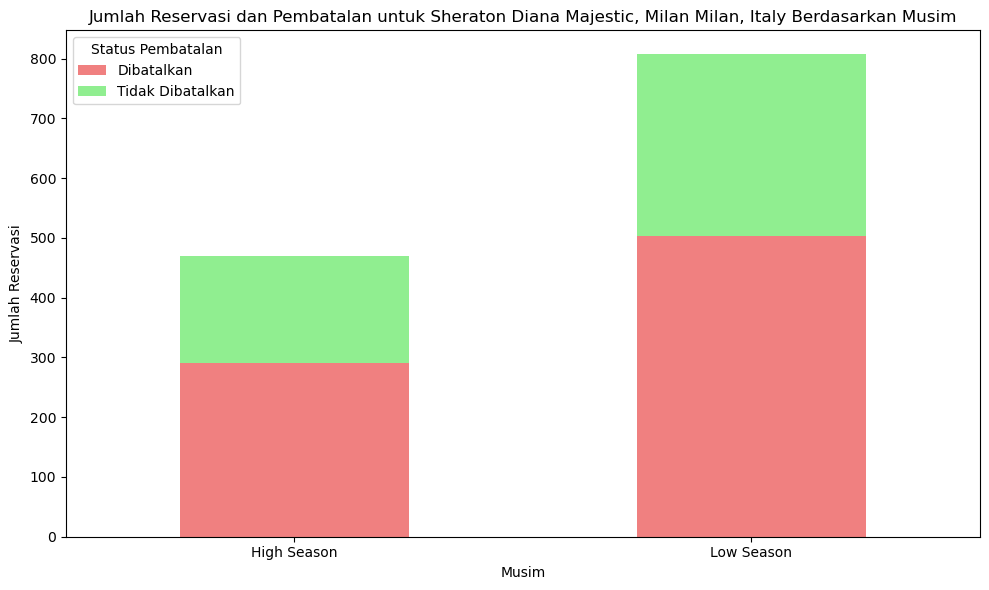

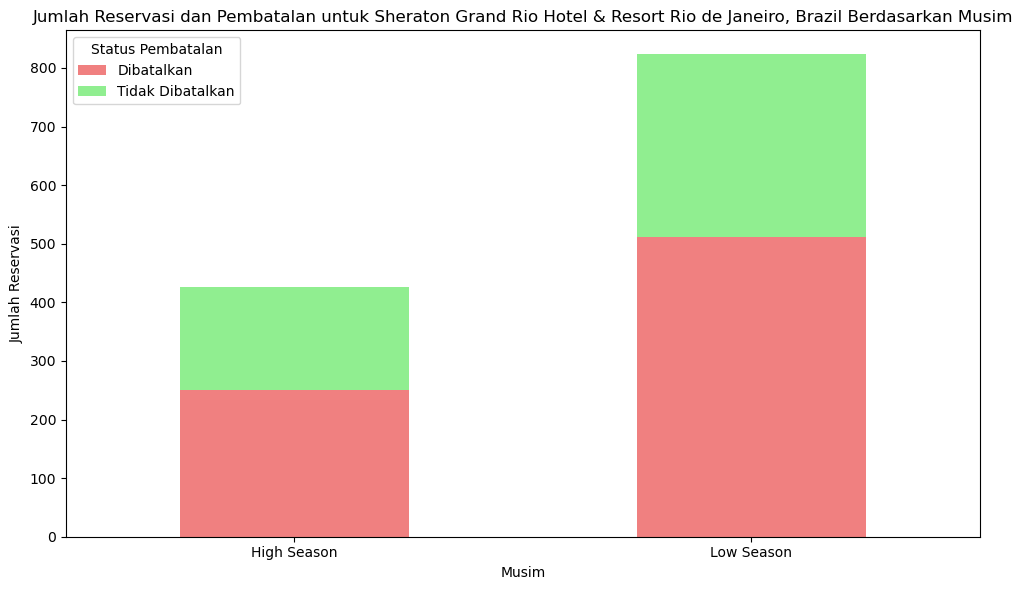

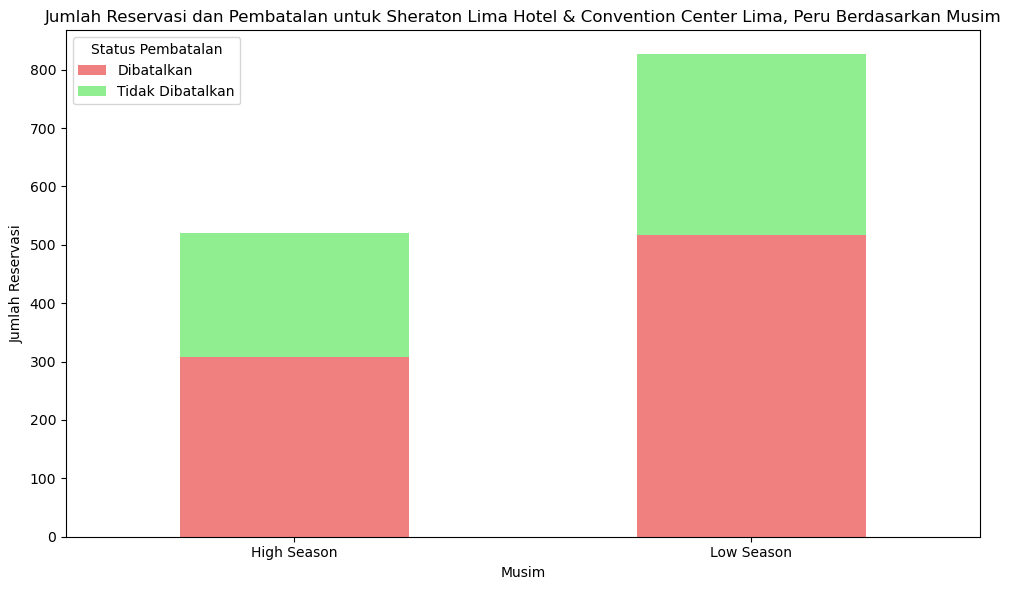

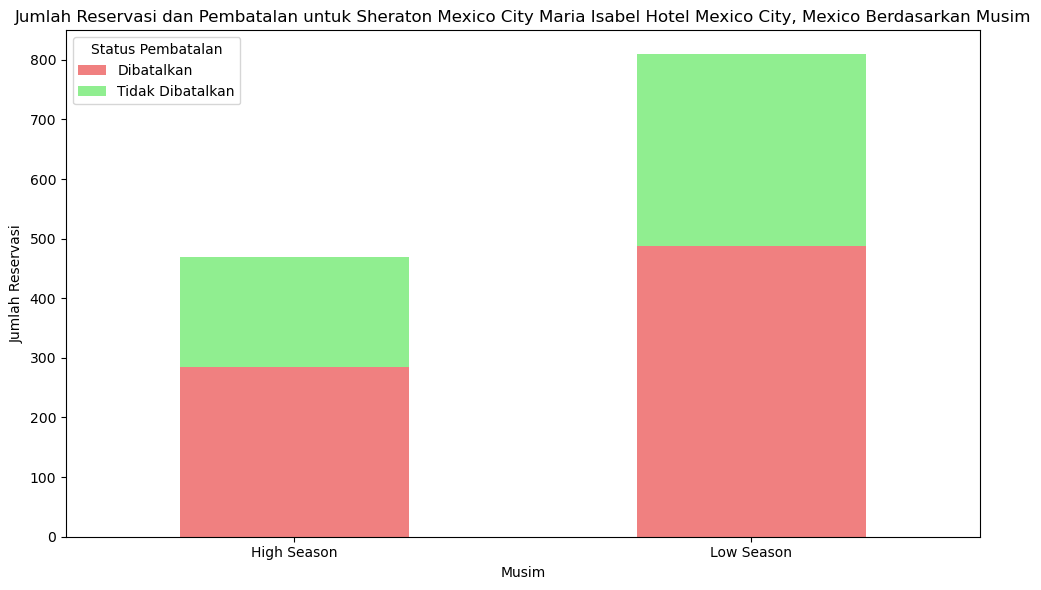

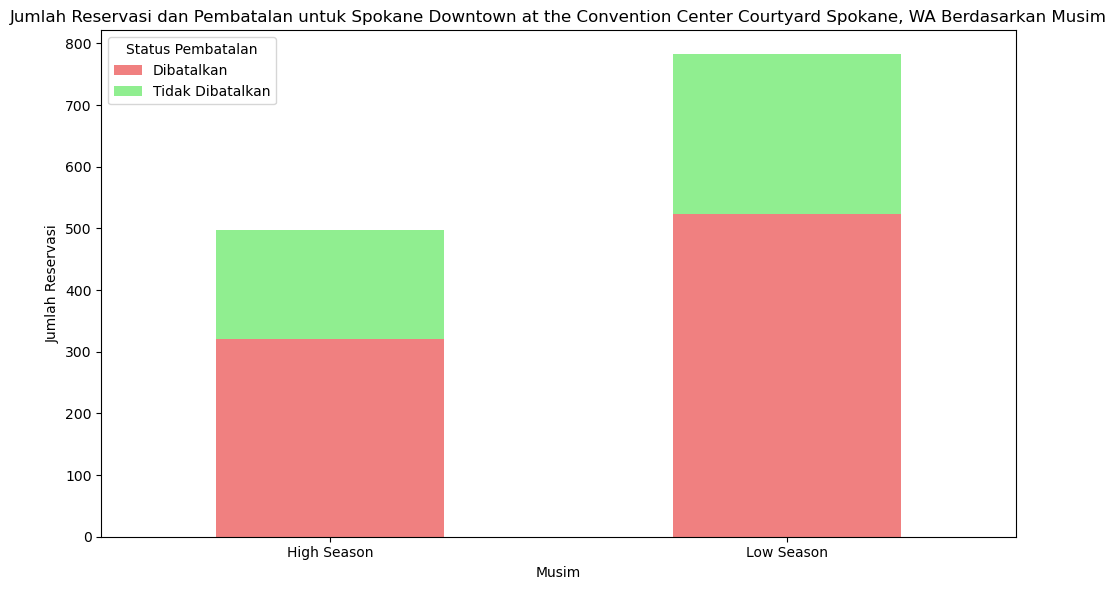

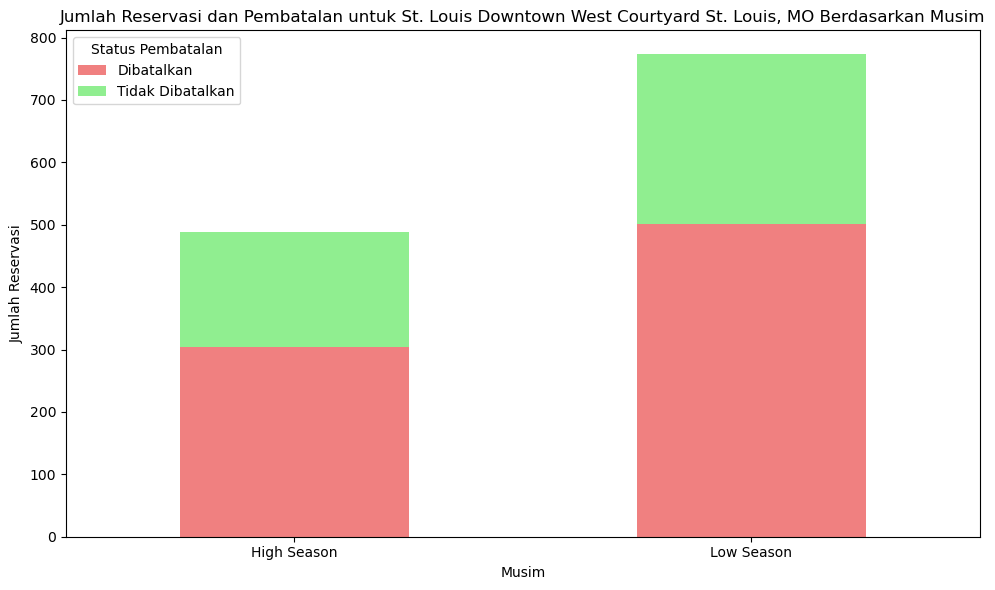

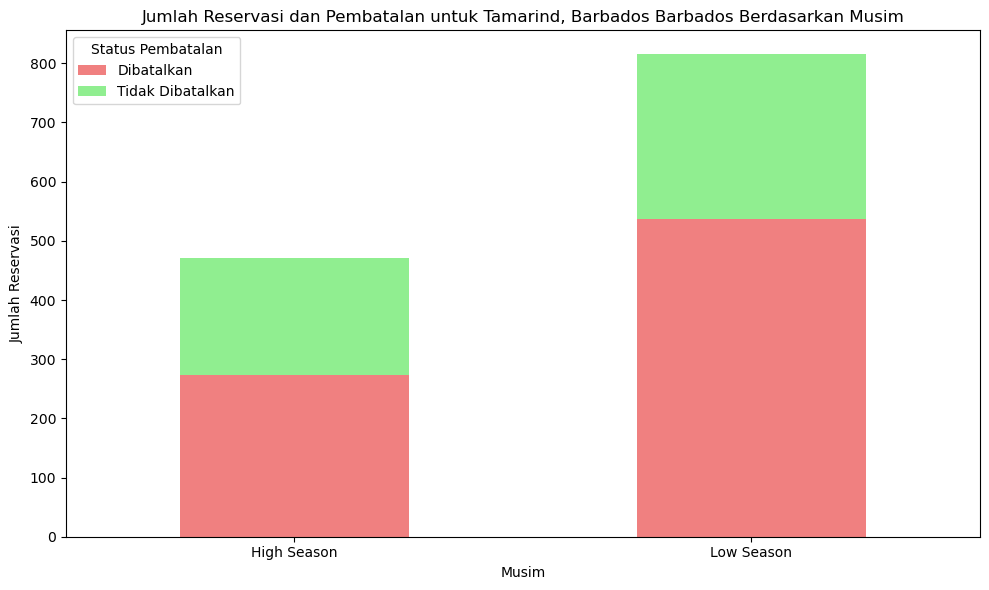

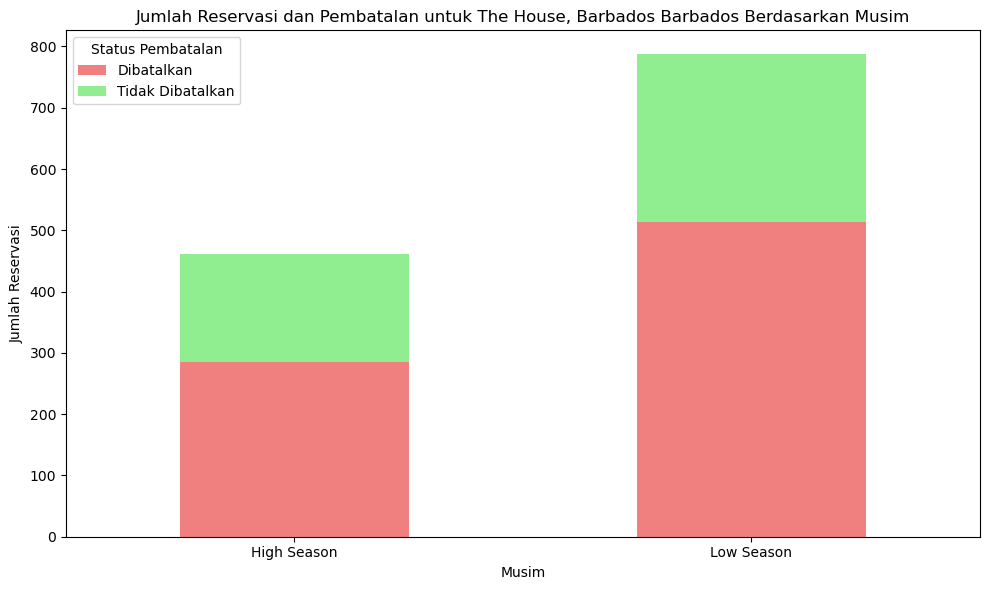

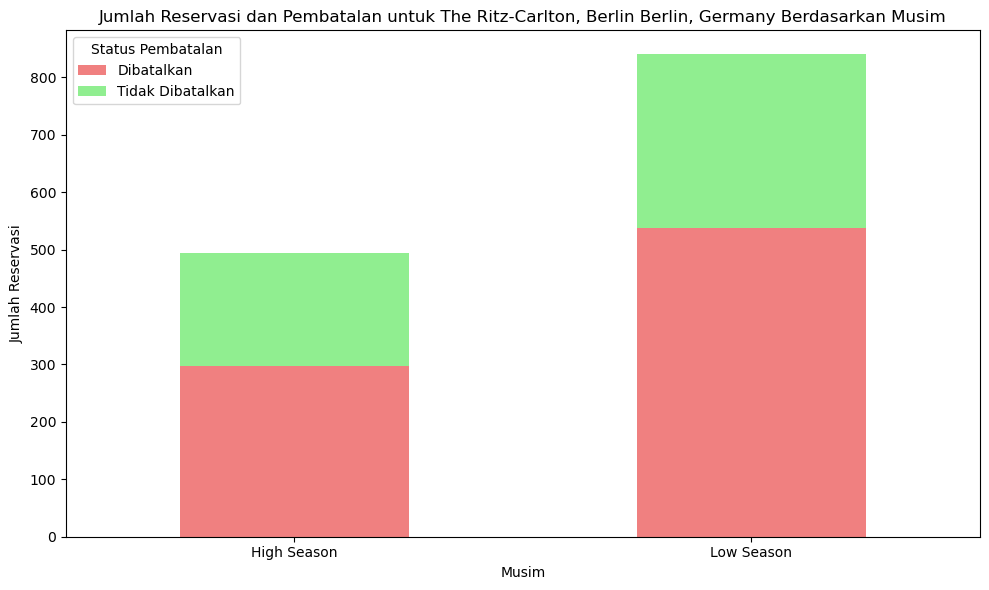

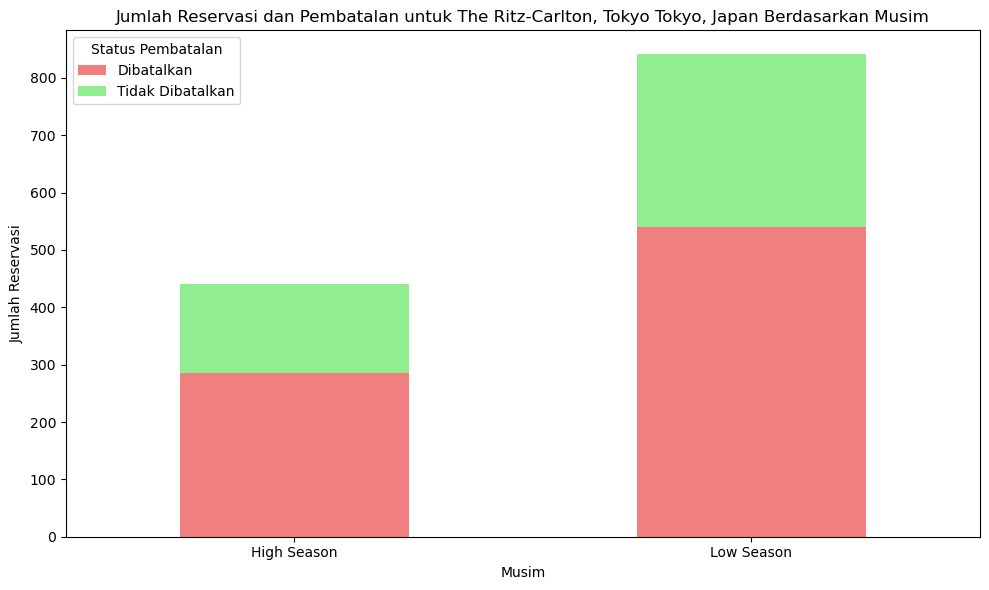

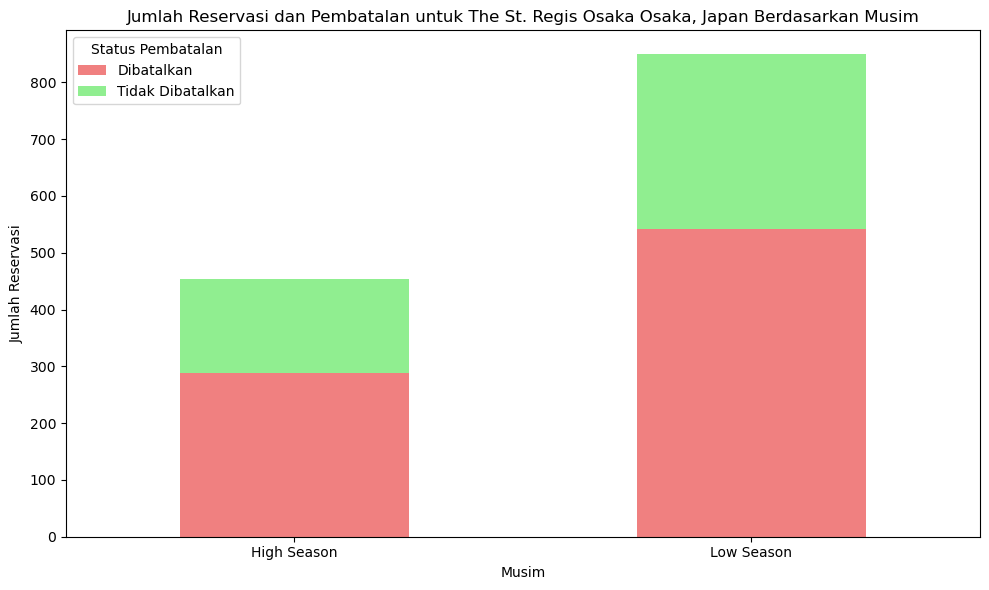

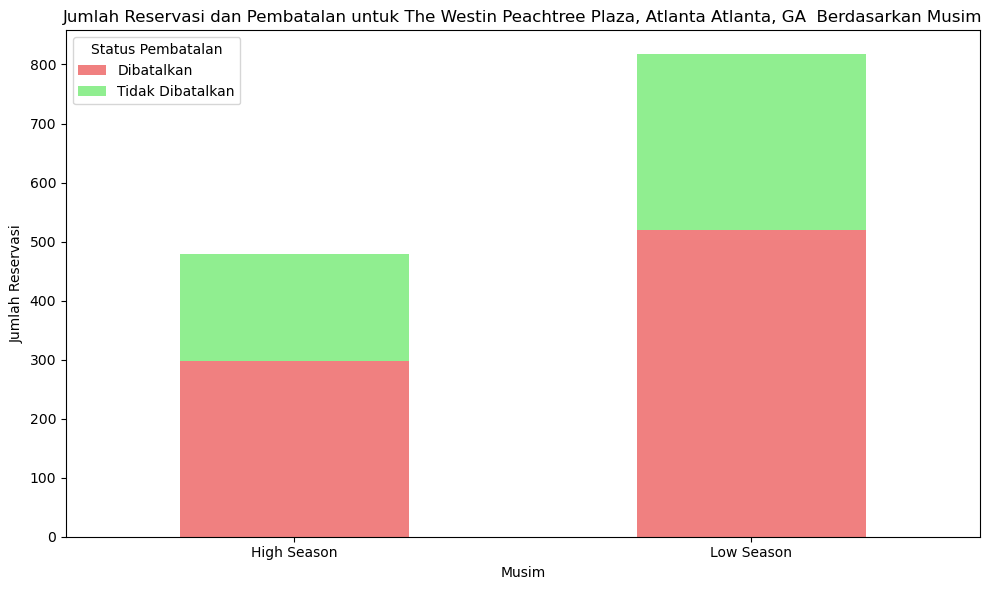

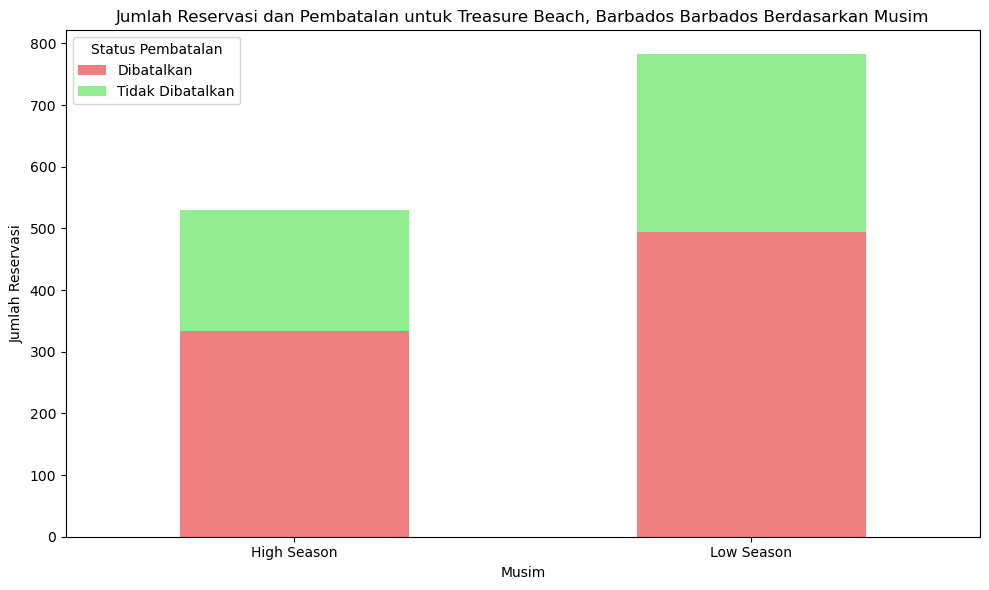

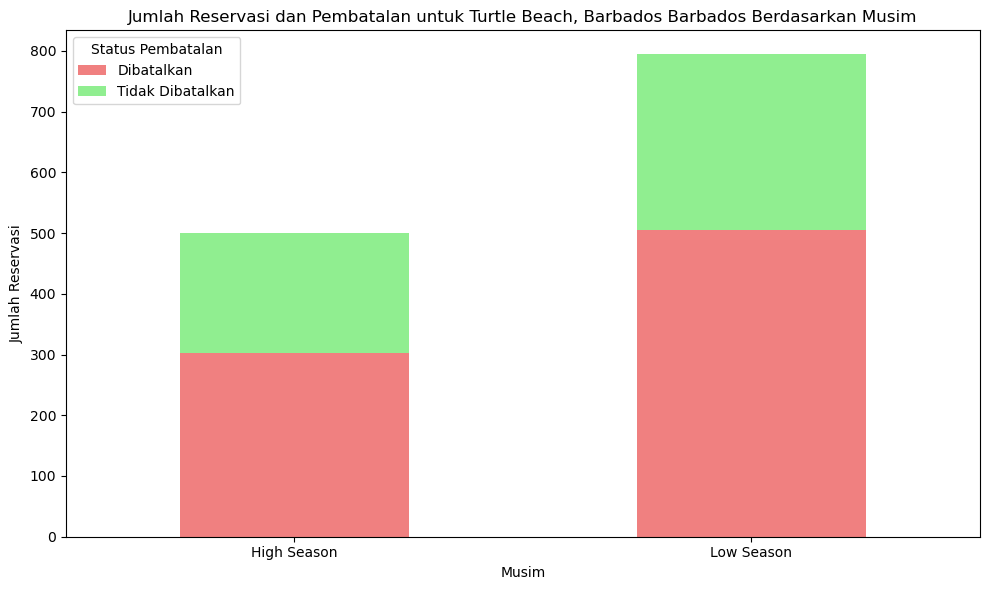

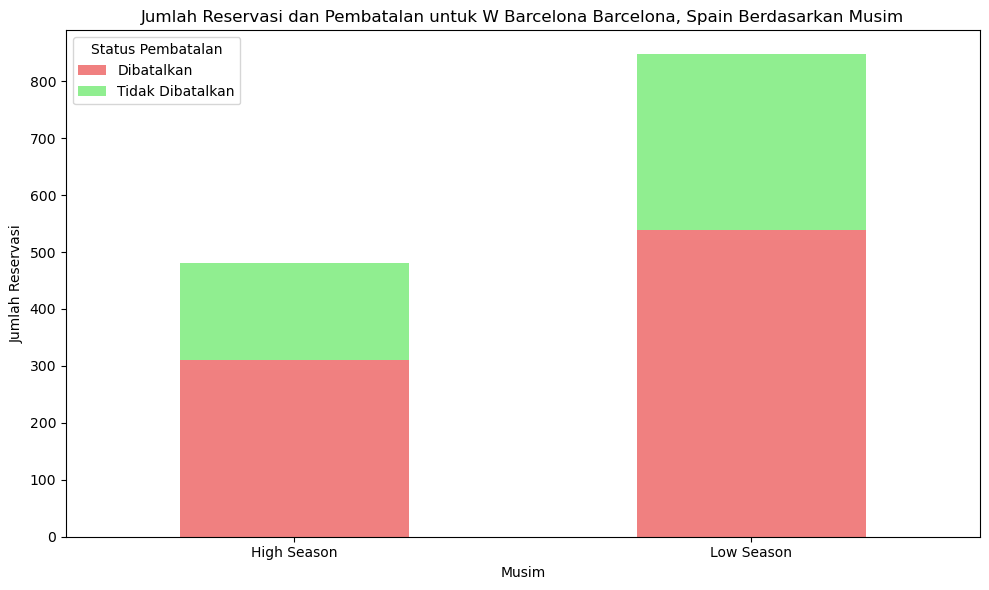

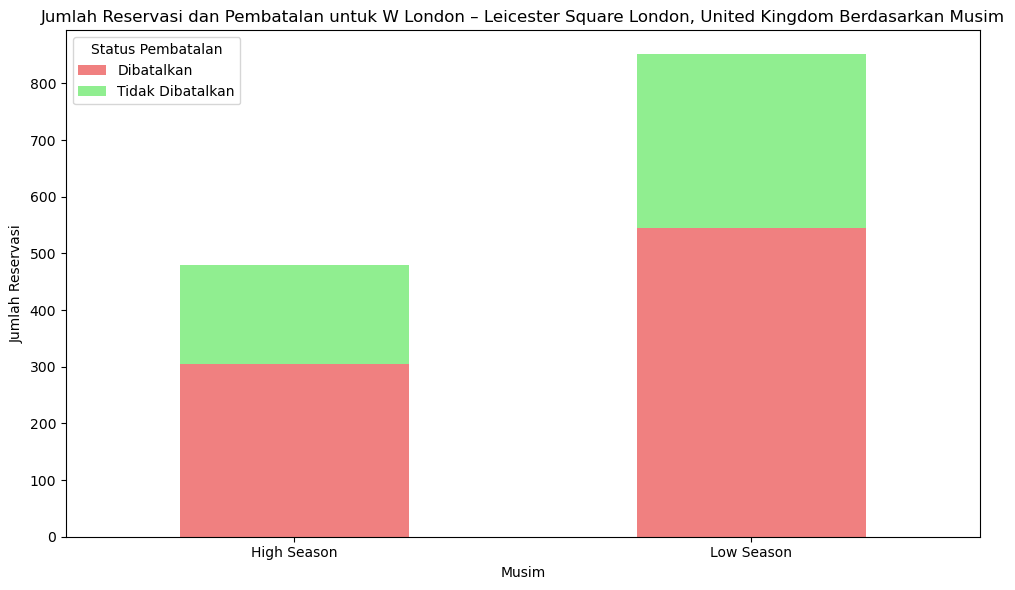

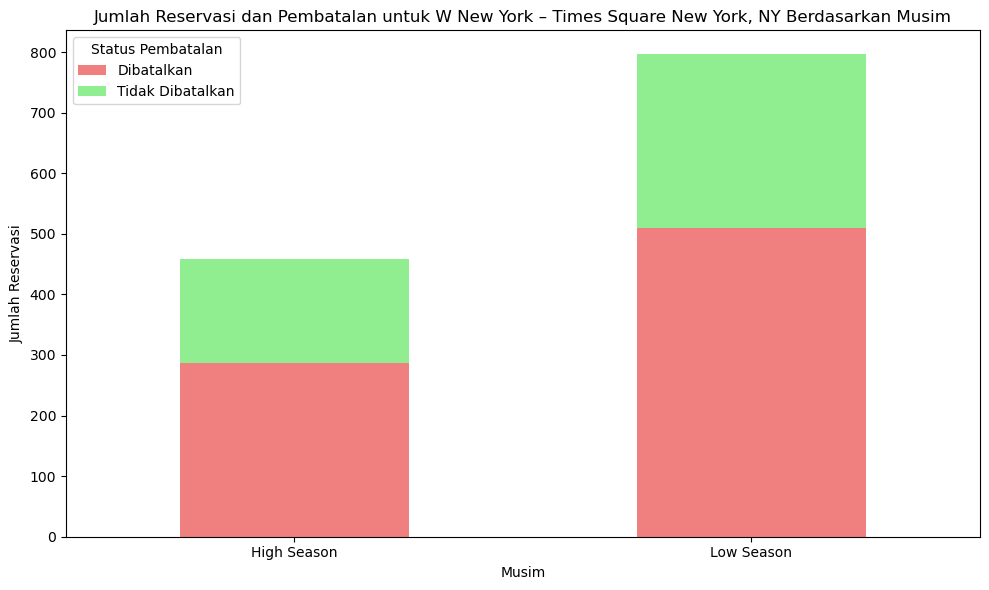

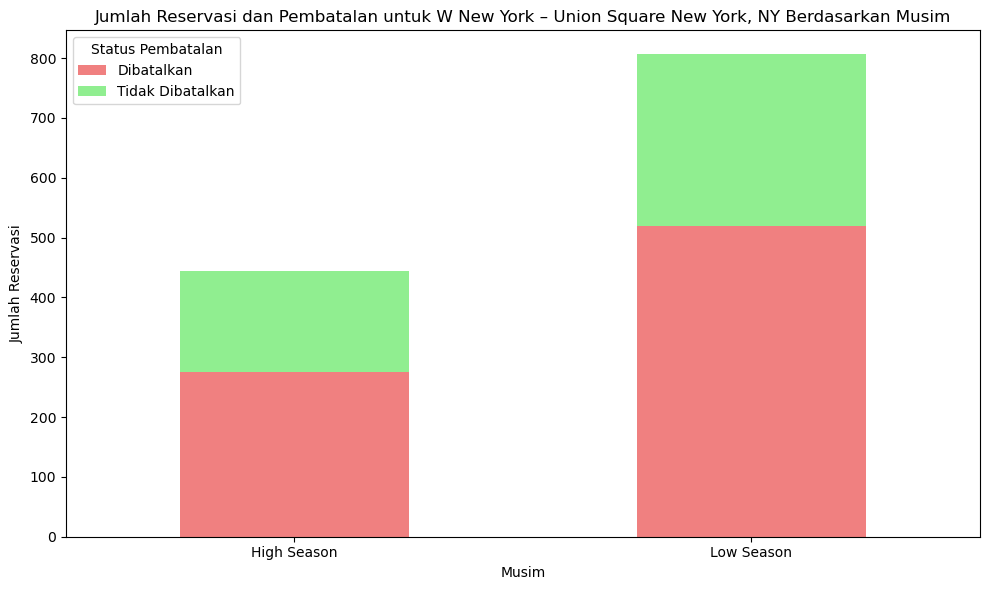

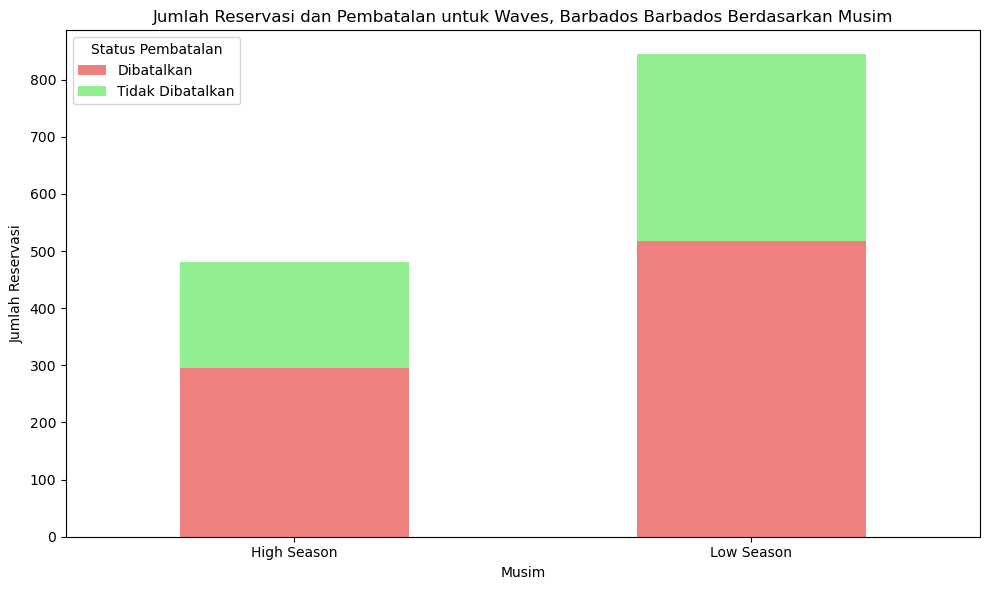

In [264]:
# Hitung jumlah reservasi dan pembatalan berdasarkan lokasi hotel dan musim
season_counts = df.groupby(['hotel', 'season', 'is_canceled']).size().unstack(fill_value=0)

# Visualisasi untuk setiap hotel
for hotel in season_counts.index.levels[0]:
    counts = season_counts.loc[hotel]

    counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], figsize=(10, 6))

    # Menambahkan detail pada plot
    plt.title(f'Jumlah Reservasi dan Pembatalan untuk {hotel} Berdasarkan Musim')
    plt.xlabel('Musim')
    plt.ylabel('Jumlah Reservasi')
    plt.xticks(rotation=0)  # Mengatur rotasi x-ticks
    plt.legend(['Dibatalkan', 'Tidak Dibatalkan'], title='Status Pembatalan')
    plt.tight_layout()
    plt.show()

Observasi:
- Seluruh cabang terlihat bahwa low season memiliki jumlah reservasi lebih tinggi dibandingkan dengan high season

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27340\3239862721.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['arrival_date_month'] + ' ' + df['arrival_date_year'].astype(str))


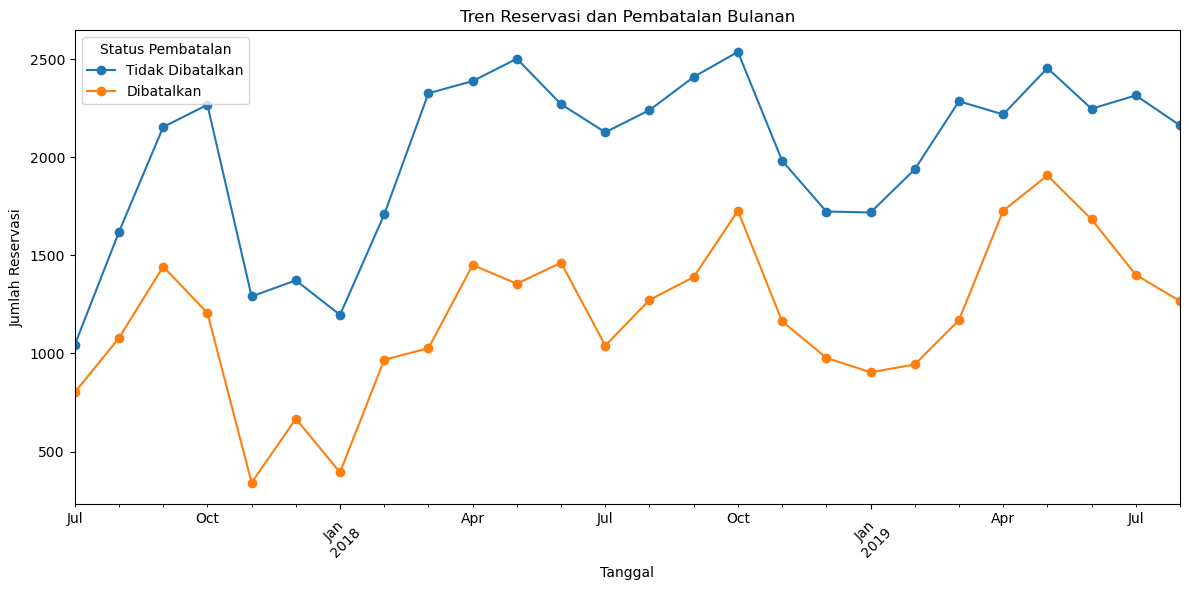

In [265]:

# Menghitung jumlah reservasi dan pembatalan bulanan
df['date'] = pd.to_datetime(df['arrival_date_month'] + ' ' + df['arrival_date_year'].astype(str))
monthly_counts = df.groupby(['date', 'is_canceled']).size().unstack(fill_value=0)

# Visualisasi tren bulanan
monthly_counts.plot(kind='line', marker='o', figsize=(12, 6))

# Menambahkan detail pada plot
plt.title('Tren Reservasi dan Pembatalan Bulanan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Reservasi')
plt.xticks(rotation=45)  # Mengatur rotasi x-ticks
plt.legend(['Tidak Dibatalkan', 'Dibatalkan'], title='Status Pembatalan')
plt.tight_layout()
plt.show()

# Feature Enginering

In [266]:
#delete column
df.drop(columns=['reservation_status_date'], inplace=True)
df.drop(columns=['bookingID'],axis='columns',inplace=True)
df.drop(columns=['reservation_status'],axis='columns',inplace=True)
df.drop(columns=['arrival_date_month'],axis='columns',inplace=True)
df.drop(columns=['date'],axis='columns',inplace=True)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  object 
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_week_number        83293 non-null  int64  
 5   arrival_date_day_of_month       83293 non-null  int64  
 6   stays_in_weekend_nights         83293 non-null  int64  
 7   stays_in_week_nights            83293 non-null  int64  
 8   adults                          83293 non-null  int64  
 9   children                        83293 non-null  float64
 10  babies                          83293 non-null  int64  
 11  meal                            83293 non-null  object 
 12  country                         

In [268]:
#encode column kategorical
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

# Mengencode kolom yang diinginkan
df['deposit_type'] = label_encoder.fit_transform(df['deposit_type'])
df['customer_type'] = label_encoder.fit_transform(df['customer_type'])
df['season']=label_encoder.fit_transform(df['season'])

column_to_encode=['hotel', 'meal', 'country',
    'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type']
for col in column_to_encode:
    df[col]=df[col].astype(str)
df_encoded=pd.get_dummies(df,columns=column_to_encode, drop_first=True,dtype=int)

In [269]:
df_encoded

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P
0,0,8,2019,2,10,0,4,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,524,2018,51,15,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,175,2019,20,19,1,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2018,43,17,1,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,33,2017,39,26,2,3,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83288,0,4,2018,44,25,0,2,2,1.0,0,...,0,0,0,0,0,0,0,0,0,0
83289,0,30,2017,38,14,1,3,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83290,0,165,2019,25,21,4,10,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
83291,0,180,2018,32,31,2,4,2,1.0,0,...,0,0,1,0,0,0,0,0,0,0


# Modeling

In [270]:
df['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.630497
1    0.369503
Name: proportion, dtype: float64

In [271]:
#Train test split
from sklearn.model_selection import train_test_split

# Step 6: Define Features and Target
X = df_encoded.drop(columns=['is_canceled'])  # Features (all columns except the target)
y = df_encoded['is_canceled'].astype(int)

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [272]:
# Standardisasi fitur numerik
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [273]:
#Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
models={
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest':RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearst Neightbors':KNeighborsClassifier(),
    'Naive Bays': GaussianNB()
}

In [274]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
  model.fit(X_train,y_train)
  #Predict
  y_pred=model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

  #Calculate evaluation metrict
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  roc_auc=roc_auc_score(y_test,y_prob)if y_prob is not None else 'N/A'

  #print classifier
  print(f'{model.__class__.__name__} Classification Report:/n', classification_report(y_test,y_pred))
  return accuracy, precision, recall, f1,roc_auc

In [277]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

model_results={}
#Compare models
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_train, X_test, y_train, y_test)
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

Evaluating Logistic Regression...


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Classification Report:/n               precision    recall  f1-score   support

           0       0.82      0.91      0.86     15690
           1       0.81      0.66      0.72      9298

    accuracy                           0.81     24988
   macro avg       0.81      0.78      0.79     24988
weighted avg       0.81      0.81      0.81     24988

Evaluating Random Forest...
RandomForestClassifier Classification Report:/n               precision    recall  f1-score   support

           0       0.88      0.94      0.91     15690
           1       0.89      0.78      0.83      9298

    accuracy                           0.88     24988
   macro avg       0.89      0.86      0.87     24988
weighted avg       0.88      0.88      0.88     24988

Evaluating Gradient Boosting...
GradientBoostingClassifier Classification Report:/n               precision    recall  f1-score   support

           0       0.85      0.92      0.88     15690
           1       0.84      0.73

In [278]:
# Convert model_results dictionary into a DataFrame for better comparison
results_df = pd.DataFrame(model_results).T

# Display the results
print("Comparison of model results:")
print(results_df)

Comparison of model results:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.813711   0.805662  0.658099  0.724442  0.892567
Random Forest        0.883664   0.891942  0.782104  0.833419  0.950449
Gradient Boosting    0.847847   0.841451  0.728329  0.780814  0.924122
K-Nearst Neightbors  0.737674   0.659942  0.608626  0.633246  0.783062
Naive Bays           0.448335   0.402001  0.989783  0.571775  0.560093


In [279]:

# Find the model with the highest score for each metric
best_accuracy_model = results_df['Accuracy'].idxmax()
best_precision_model = results_df['Precision'].idxmax()
best_recall_model = results_df['Recall'].idxmax()
best_f1_model = results_df['F1-Score'].idxmax()
best_roc_auc_model = results_df['ROC-AUC'].idxmax()

# Print out the best model for each metric
print(f"\nModel with the best Accuracy: {best_accuracy_model} - Accuracy: {results_df['Accuracy'].max()}")
print(f"Model with the best Precision: {best_precision_model} - Precision: {results_df['Precision'].max()}")
print(f"Model with the best Recall: {best_recall_model} - Recall: {results_df['Recall'].max()}")
print(f"Model with the best F1-Score: {best_f1_model} - F1-Score: {results_df['F1-Score'].max()}")
print(f"Model with the best ROC-AUC: {best_roc_auc_model} - ROC-AUC: {results_df['ROC-AUC'].max()}")


Model with the best Accuracy: Random Forest - Accuracy: 0.8836641587962222
Model with the best Precision: Random Forest - Precision: 0.891941616582853
Model with the best Recall: Naive Bays - Recall: 0.9897827489782749
Model with the best F1-Score: Random Forest - F1-Score: 0.8334192882929345
Model with the best ROC-AUC: Random Forest - ROC-AUC: 0.9504492526405276


In [281]:
# Hyperparameter tuning for Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [282]:
# Best parameters
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [284]:
# Evaluate the best Random Forest model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     15690
           1       0.89      0.79      0.83      9298

    accuracy                           0.88     24988
   macro avg       0.89      0.86      0.87     24988
weighted avg       0.88      0.88      0.88     24988



In [286]:
model_comparison = pd.DataFrame(model_results).T
print("\nModel Comparison:\n", model_comparison)


Model Comparison:
                      Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.813711   0.805662  0.658099  0.724442  0.892567
Random Forest        0.883664   0.891942  0.782104  0.833419  0.950449
Gradient Boosting    0.847847   0.841451  0.728329  0.780814  0.924122
K-Nearst Neightbors  0.737674   0.659942  0.608626  0.633246  0.783062
Naive Bays           0.448335   0.402001  0.989783  0.571775  0.560093


Model terbarunya lebih jelek setelah di tunning